In [12]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats

In [14]:
# Load data
house_prices_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
X = house_prices_data.drop('SalePrice', axis=1)  # Features
y = house_prices_data['SalePrice']  # Target

In [15]:
# Numerical preprocessing steps (impute missing values and scale)
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())                 # Scale numerical features
])

In [16]:
# Categorical preprocessing steps (impute missing values and one-hot encode)
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode categorical features
])

In [17]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [18]:
# Outlier detection using z-score
def detect_outliers_zscore(X, threshold=3):
    if isinstance(X, pd.DataFrame):
        numeric_data = X.select_dtypes(include=[np.number])
        z_scores = np.abs(stats.zscore(numerical_data, nan_policy='omit'))
        outliers = (z_scores > threshold).any(axis=1)
        return X[~outliers]
    else:
        return X

In [19]:
# Multicollinearity detection and removal
def Multicollinearity1(X, threshold=0.9):
    if isinstance(X, pd.DataFrame):
        corr_matrix = X.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
        return X.drop(to_drop, axis=1)
    else:
        return X

In [20]:
# Full pipeline including outlier detection, multi-collinearity removal, and cleaning data
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('outlier_detector', FunctionTransformer(func=detect_outliers_zscore)),
    ('multicollinearity_remover', FunctionTransformer(func=Multicollinearity1))
])

In [21]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Fit preprocessing pipeline to training data
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train, y_train)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

In [23]:
print("X_train_preprocessed shape: ", X_train_preprocessed.shape)
print("X_test_preprocessed shape: ", X_test_preprocessed.shape)

X_train_preprocessed shape:  (1168, 286)
X_test_preprocessed shape:  (292, 286)


In [24]:
#Checking the pipeline to training data
print(X_train.shape)
print(X_test.shape)

(1168, 80)
(292, 80)


Type of X_train_preprocessed: <class 'scipy.sparse._csr.csr_matrix'>
Type of X_train: <class 'pandas.core.frame.DataFrame'>


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


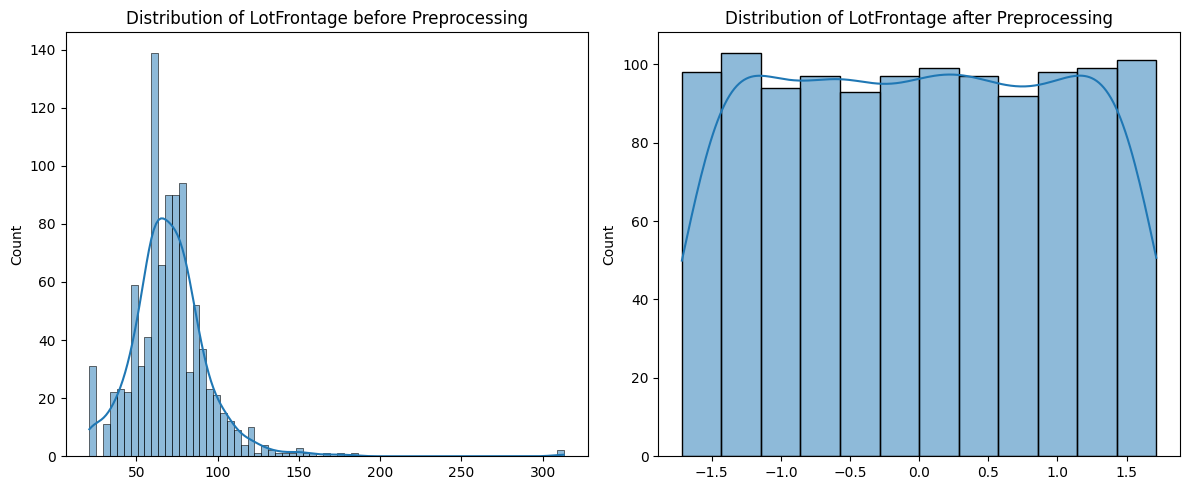

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


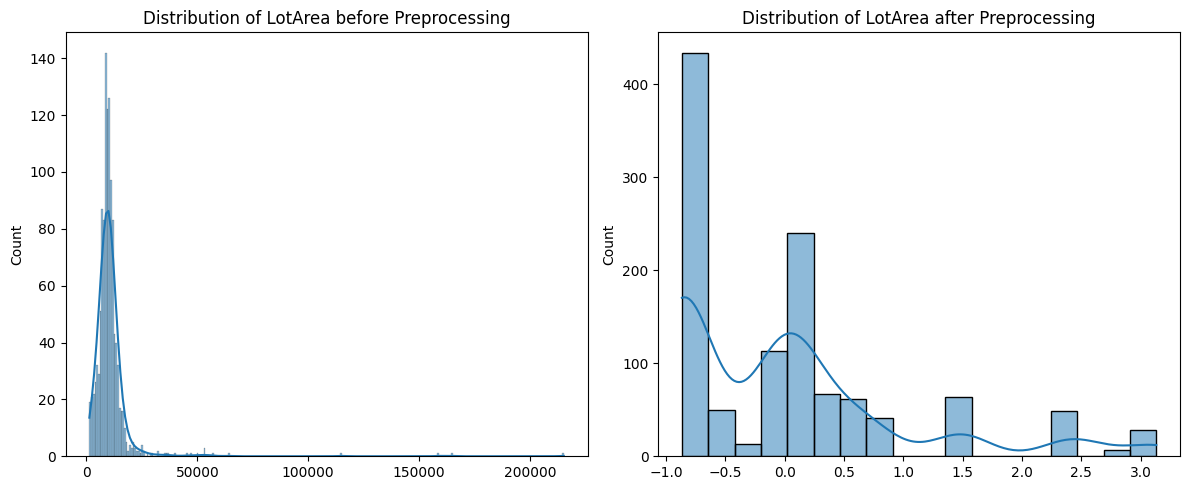

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


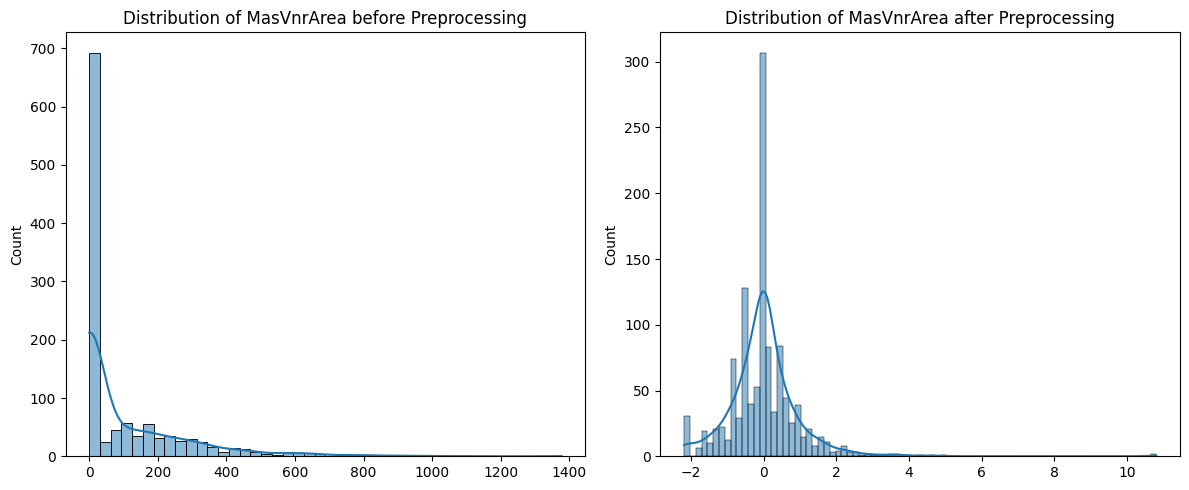

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


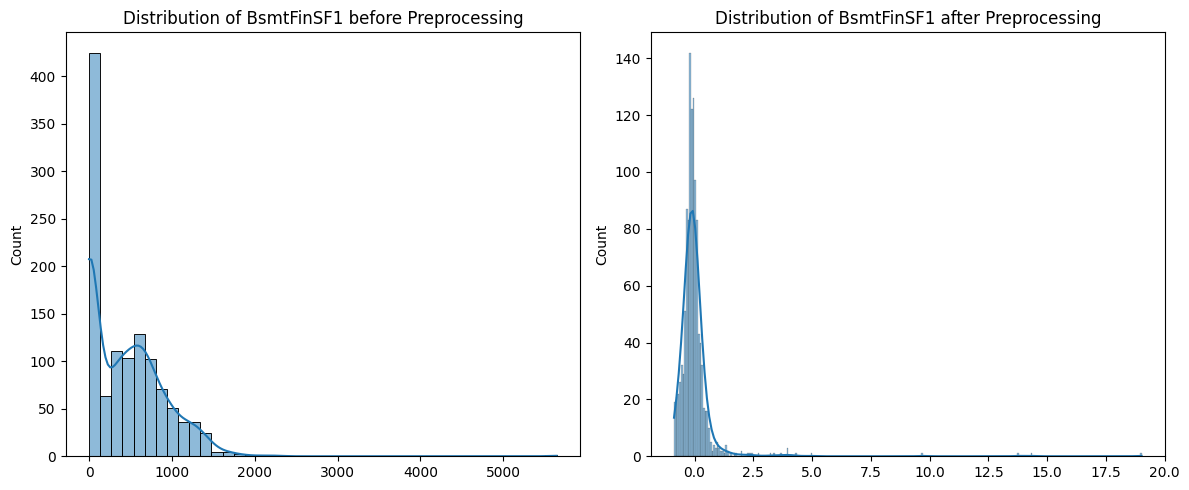

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


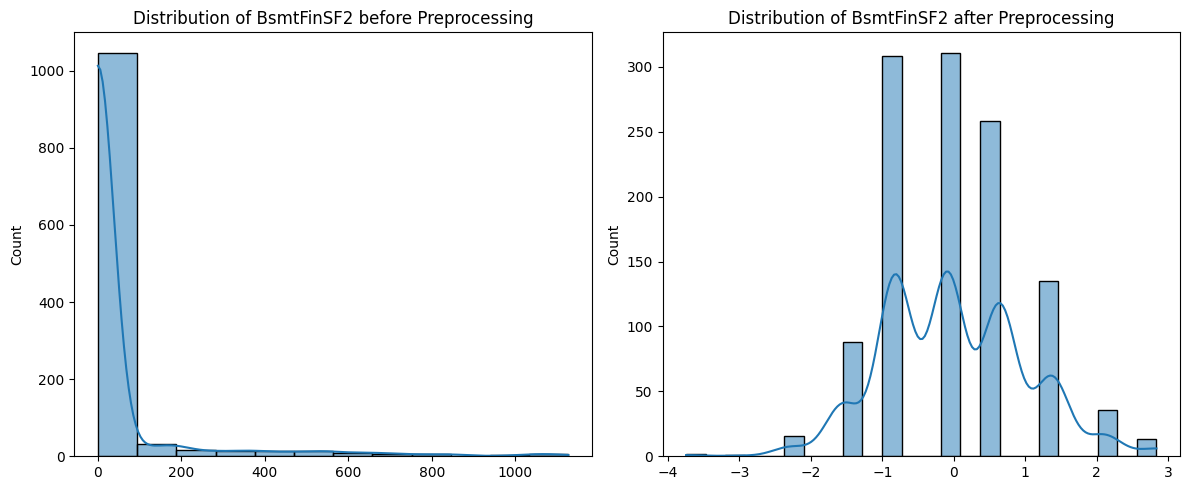

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


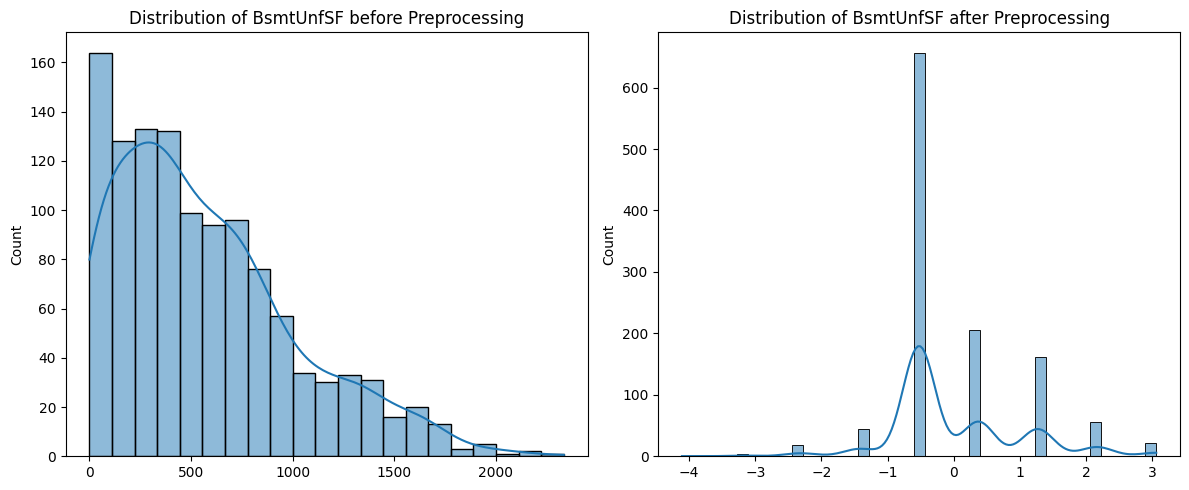

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


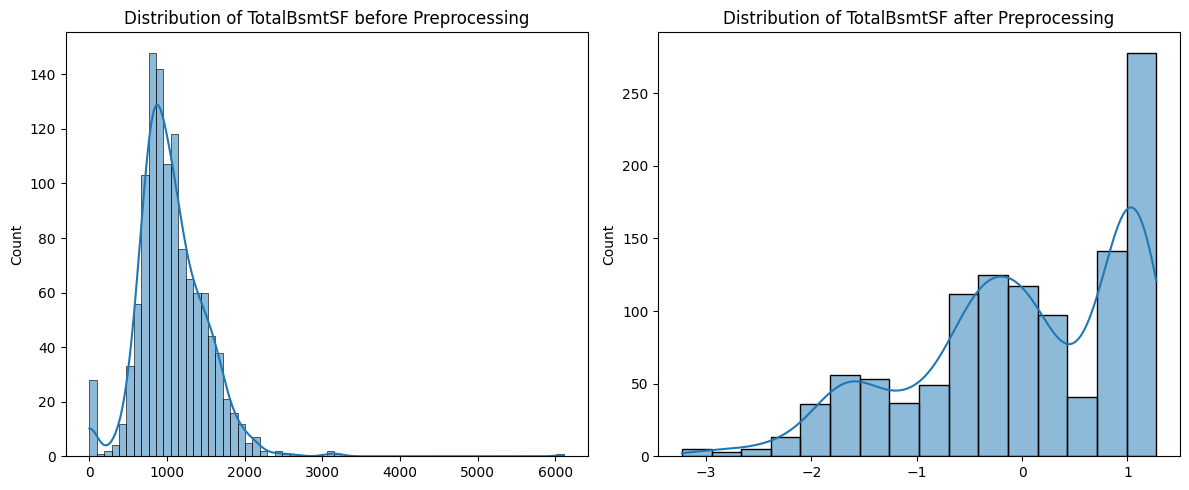

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


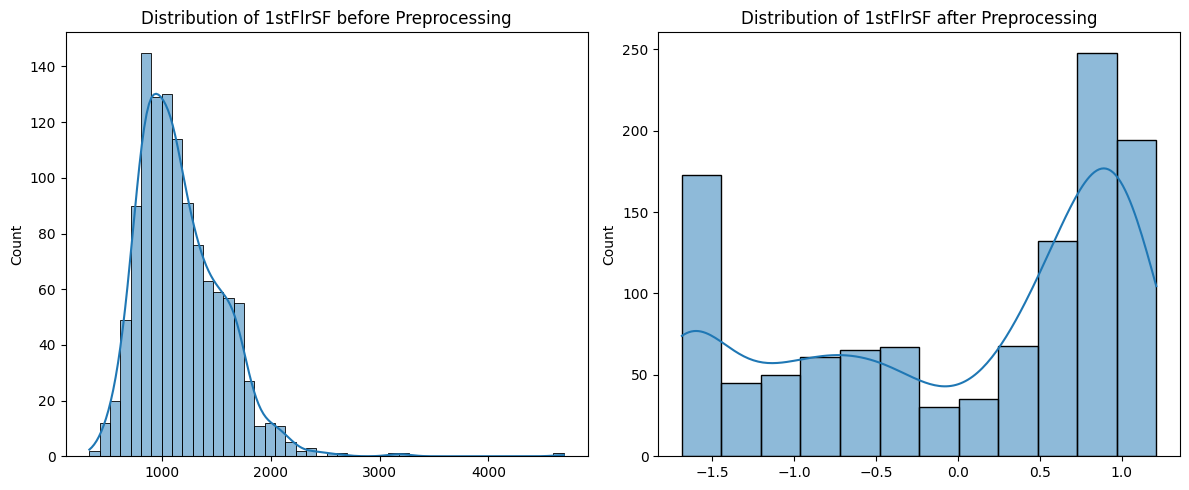

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


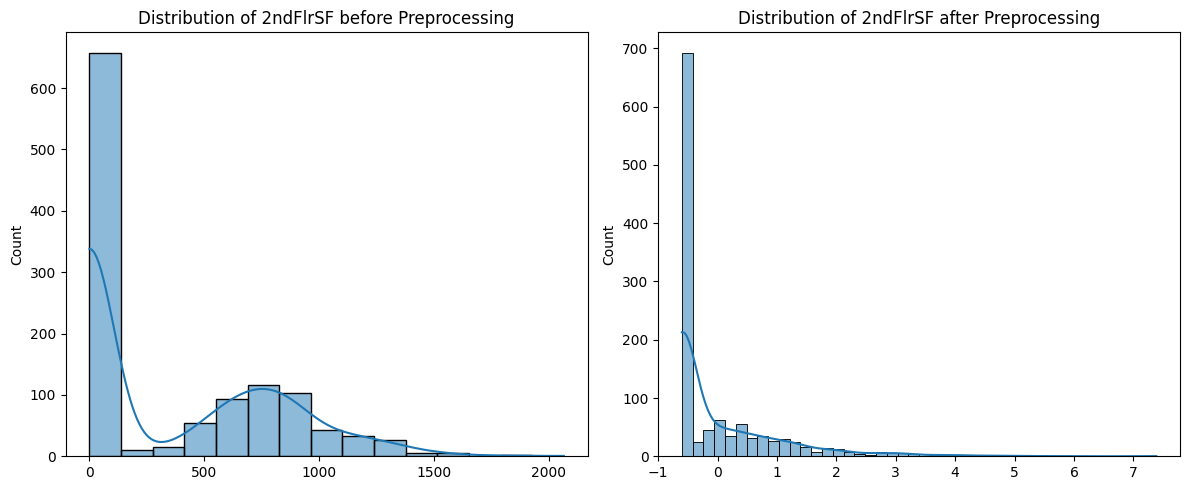

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


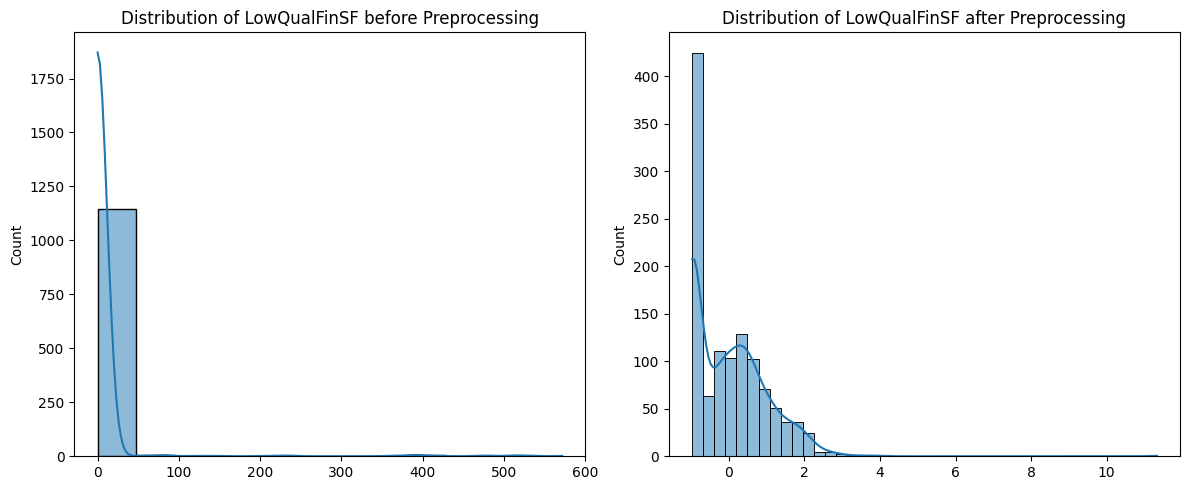

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


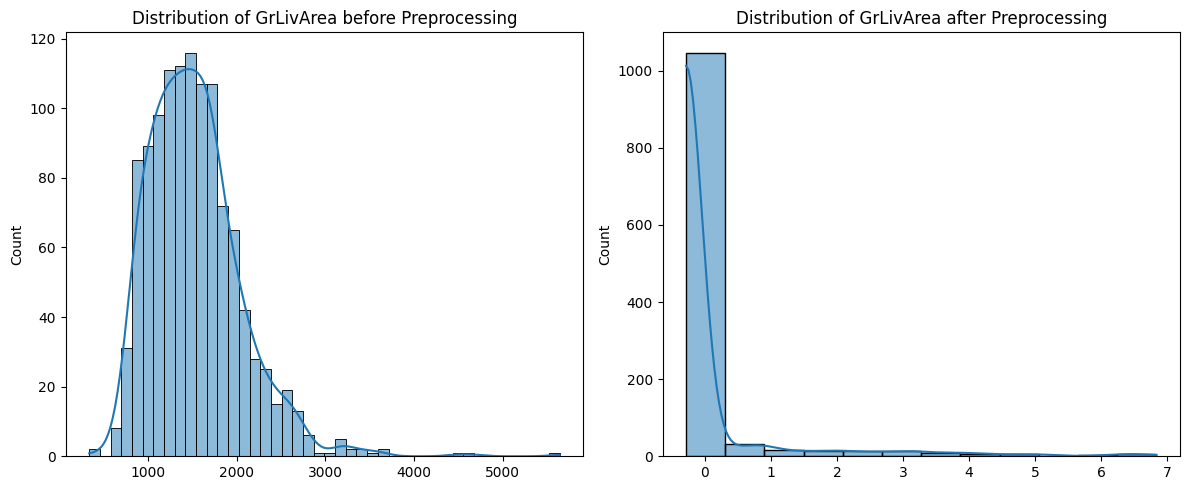

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


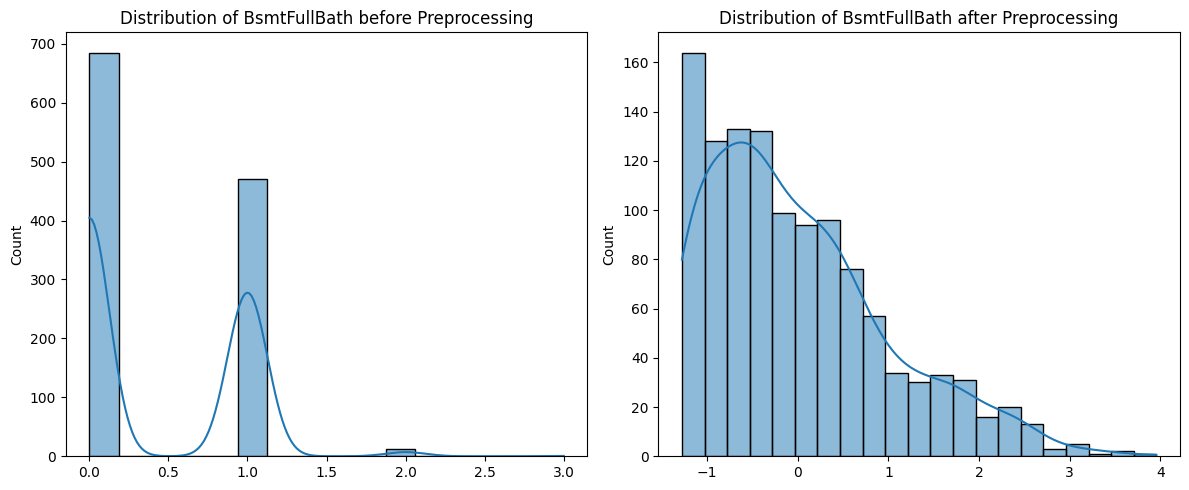

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


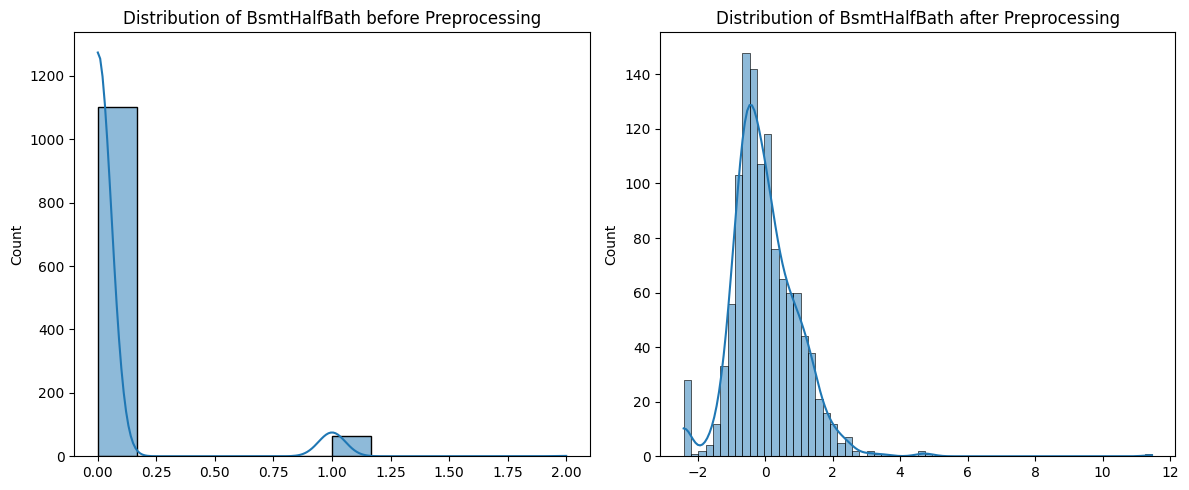

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


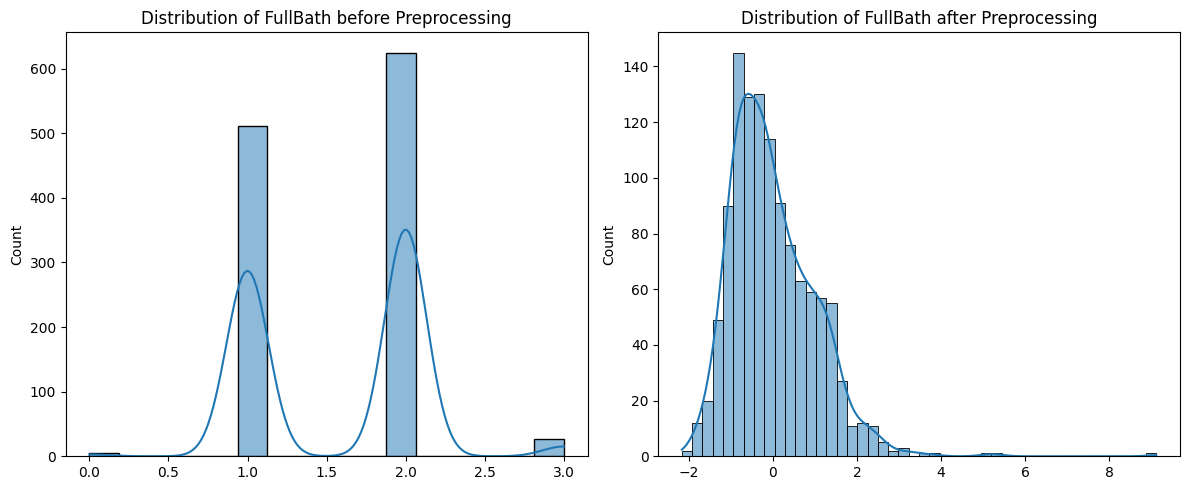

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


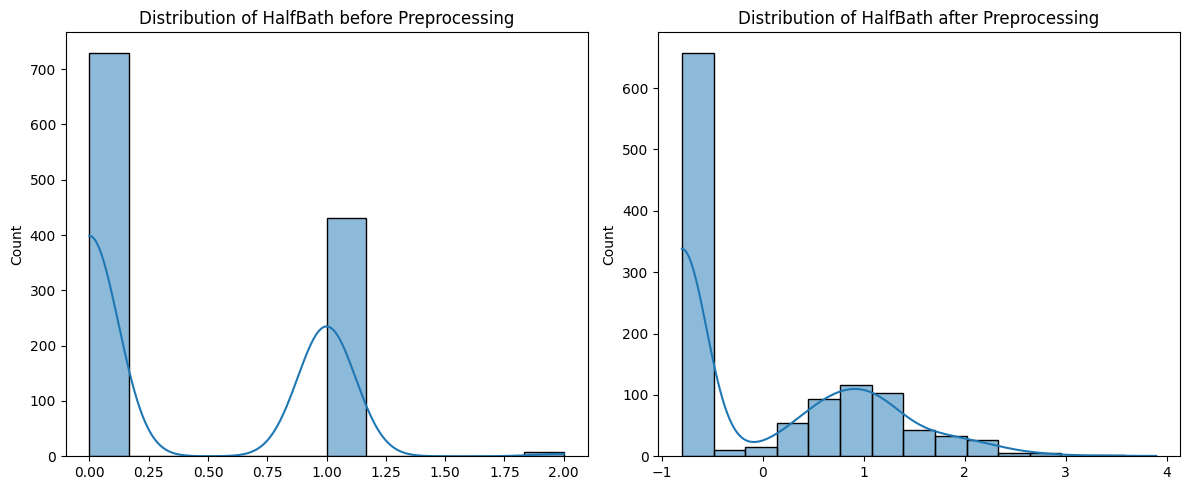

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


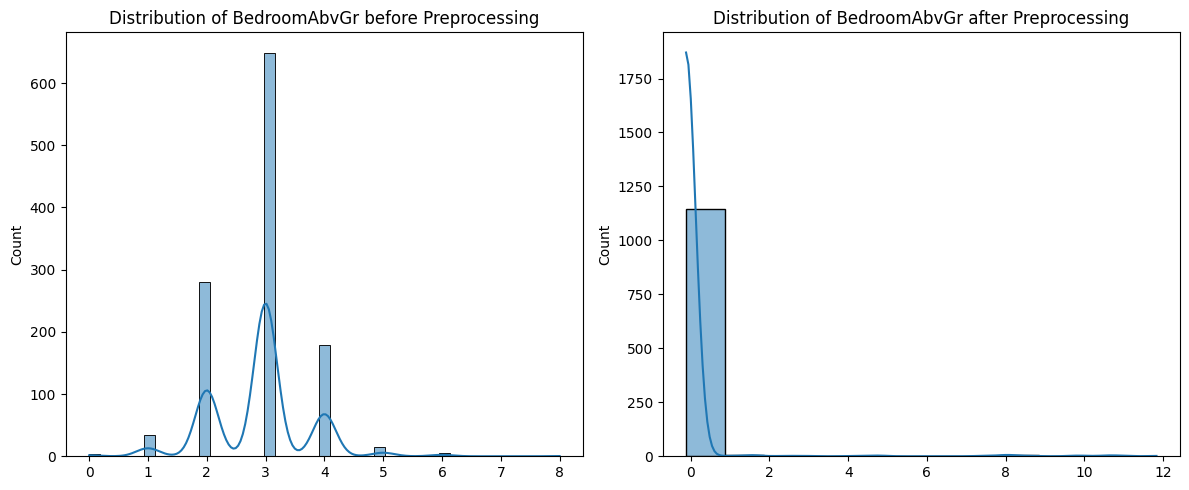

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


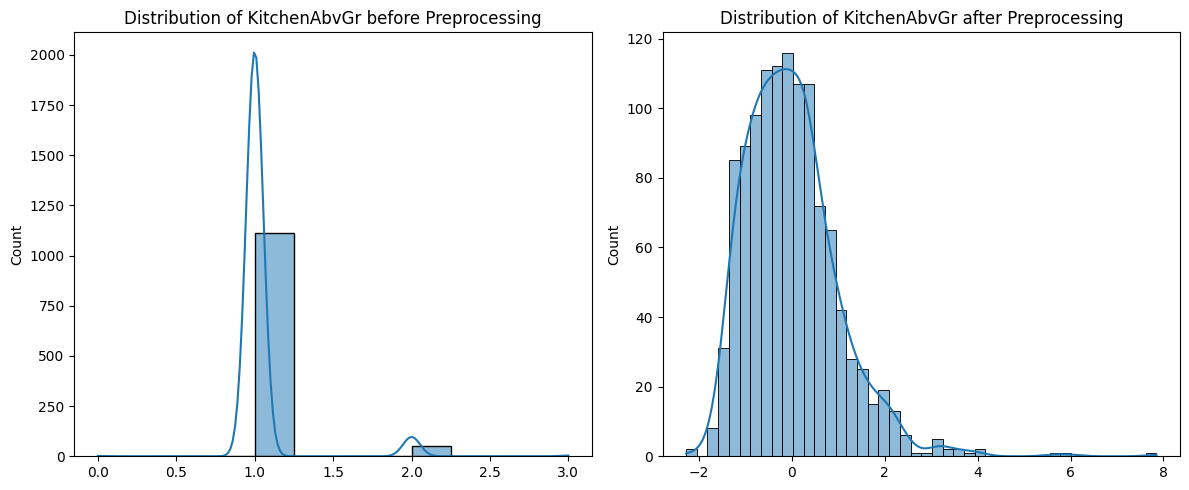

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


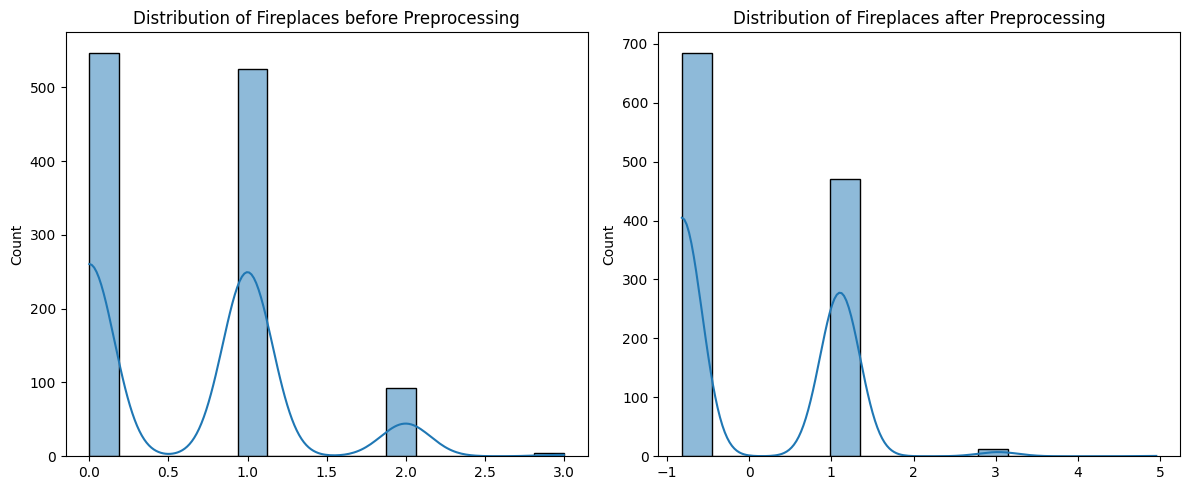

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


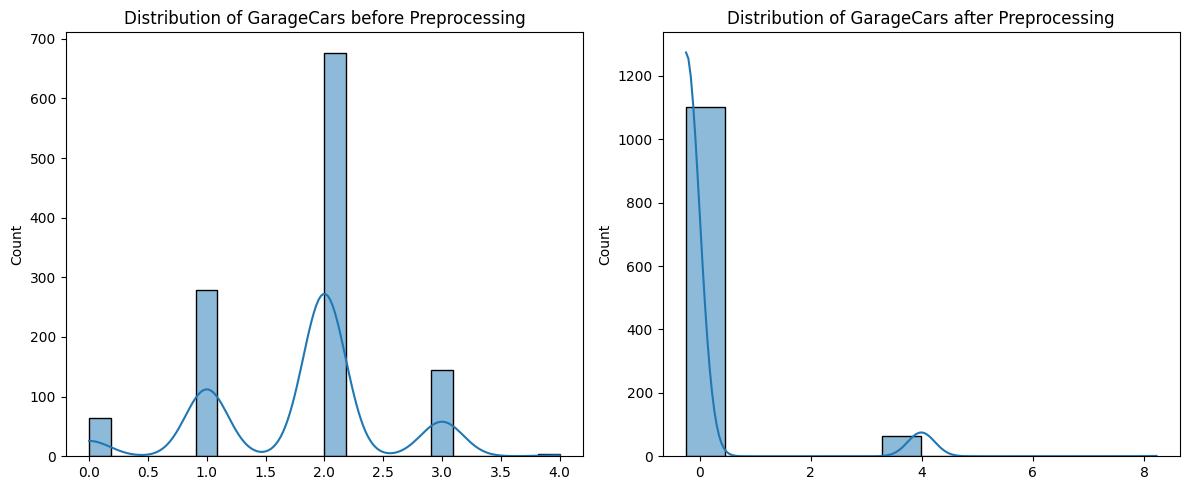

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


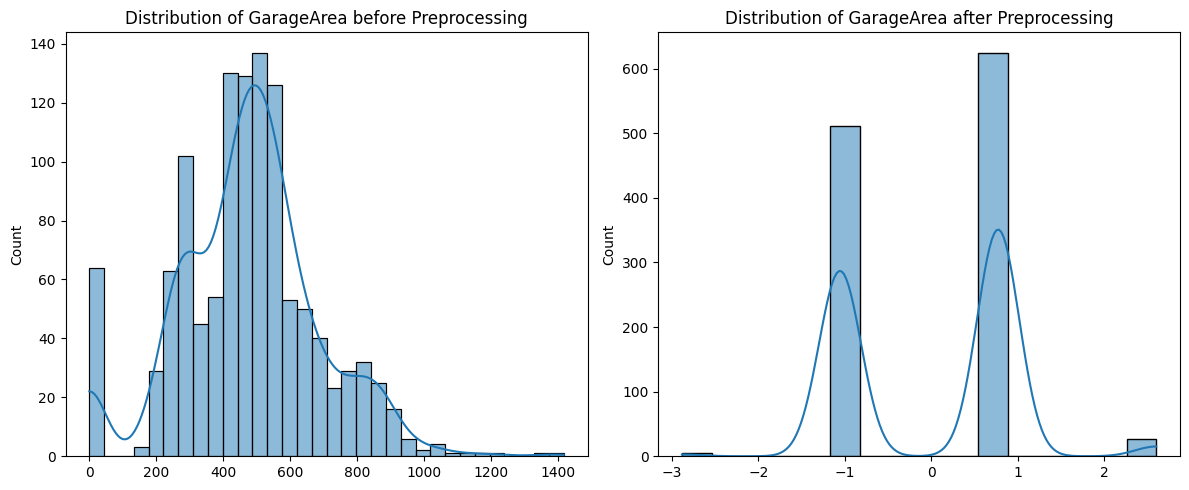

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


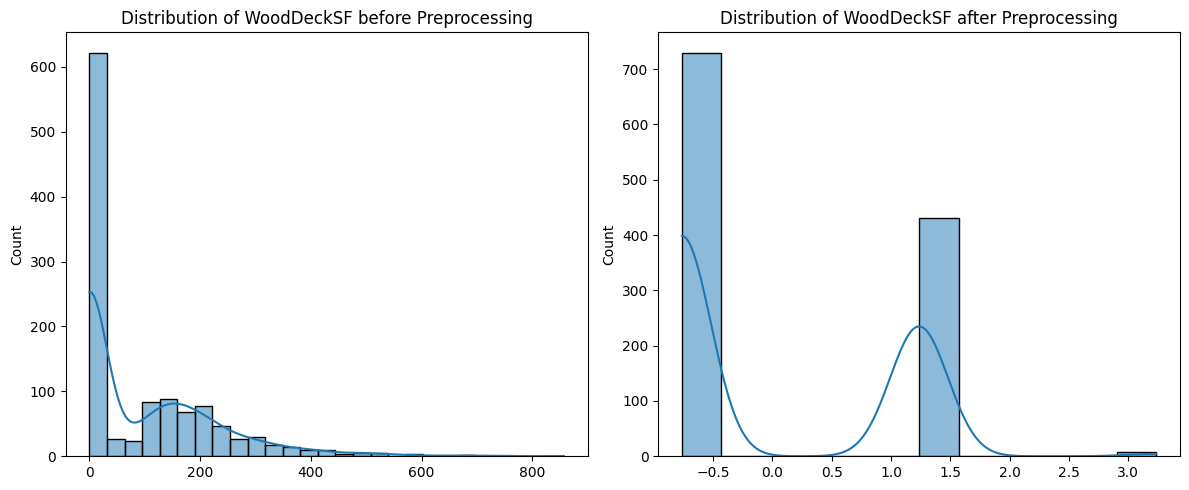

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


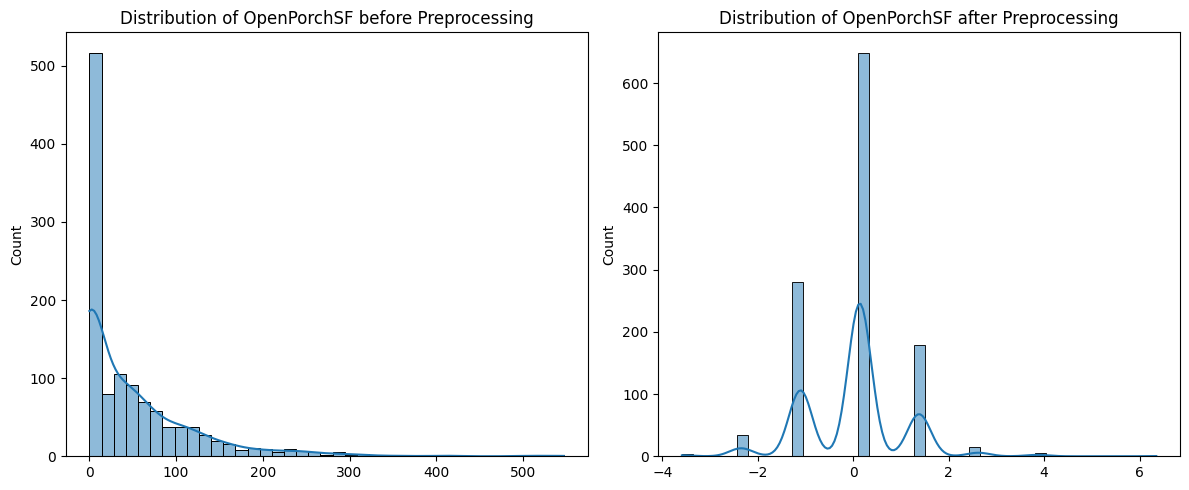

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


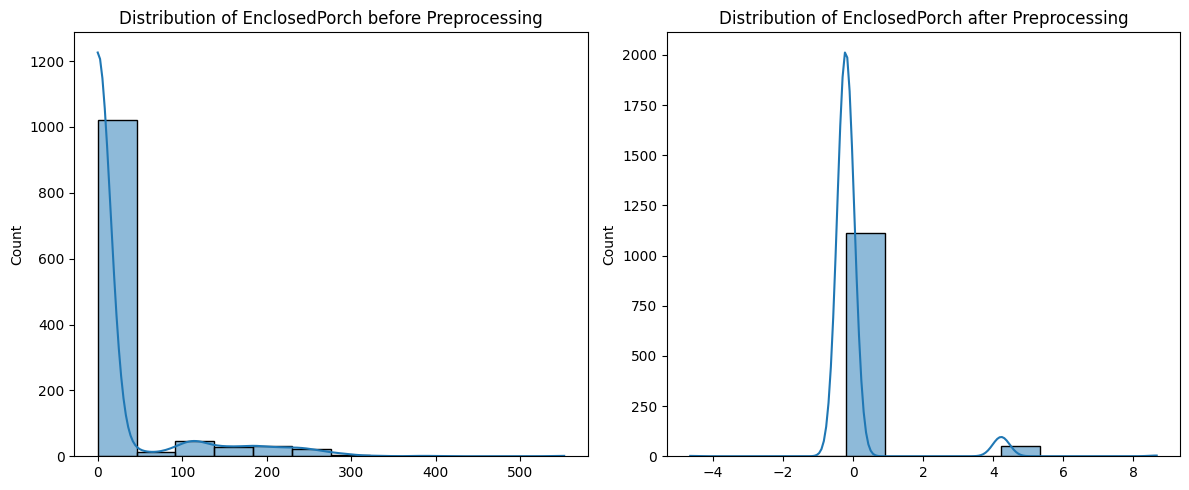

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


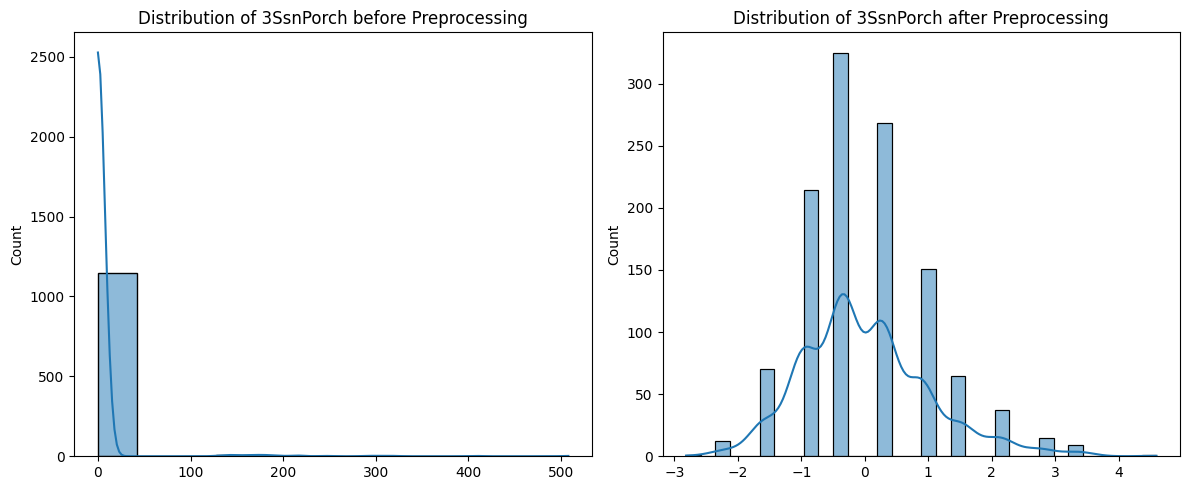

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


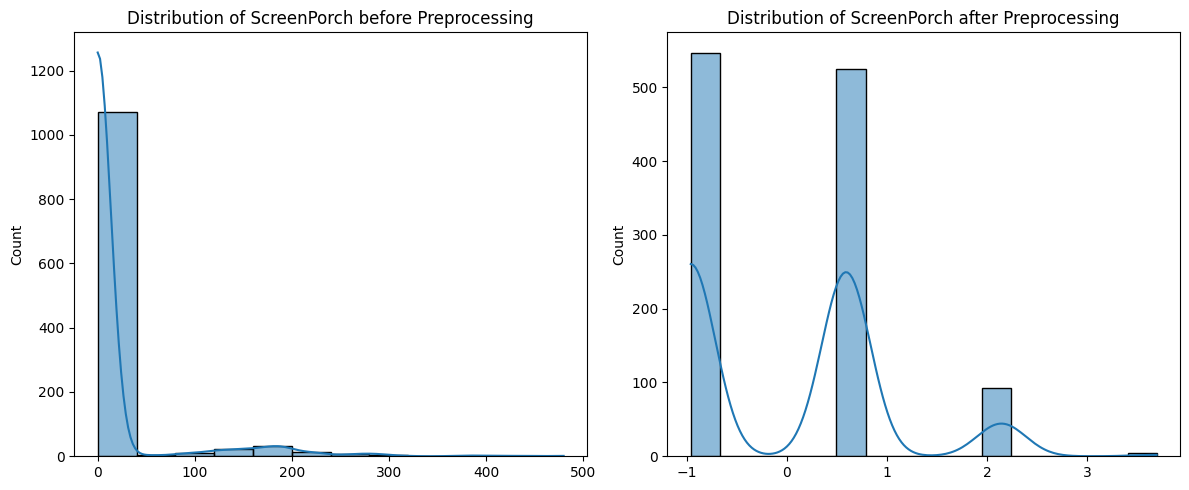

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


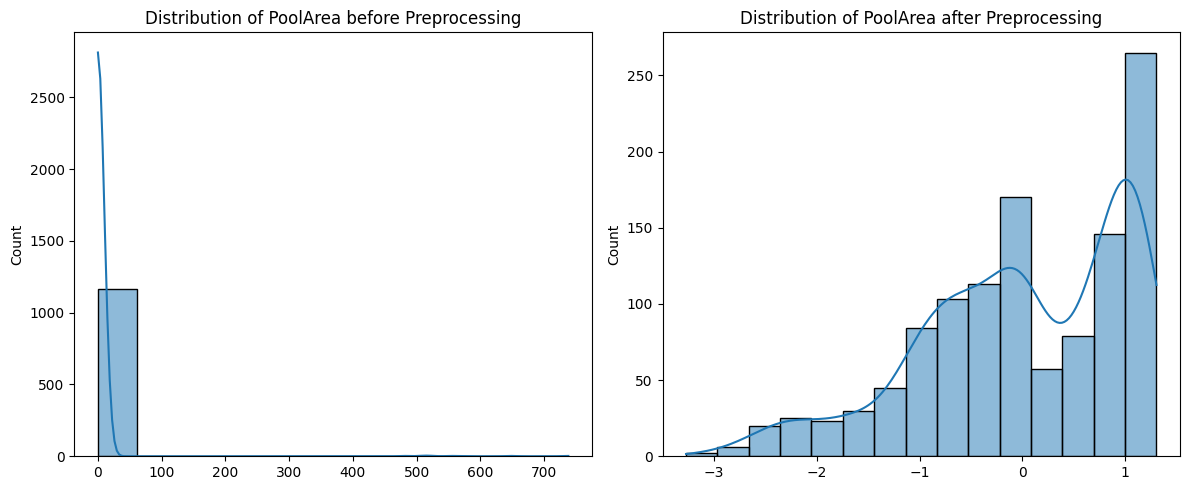

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


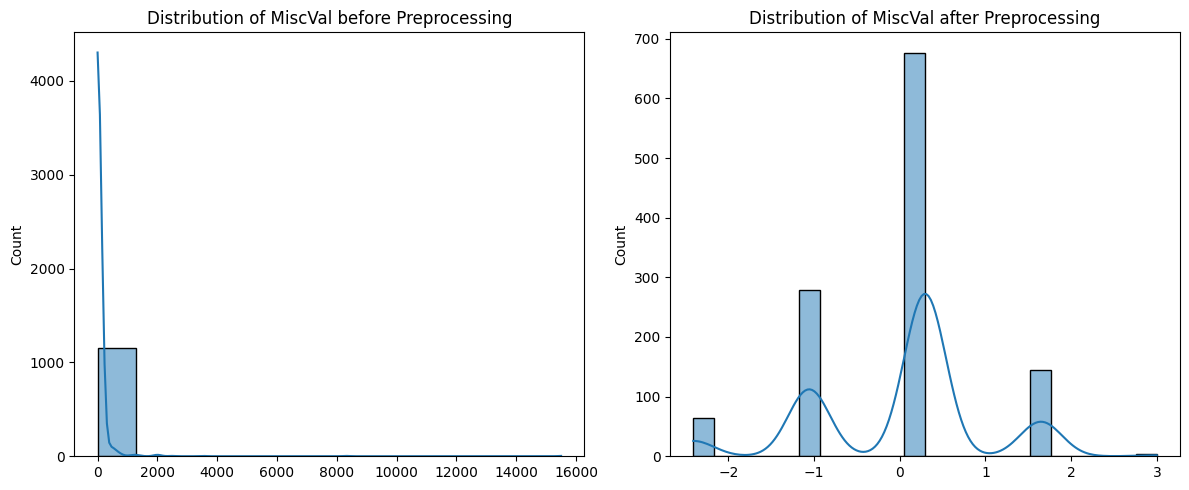

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

def visualize_preprocessing(X_train, X_train_preprocessed, numerical_features):
    # Check the type of X_train_preprocessed
    print(f"Type of X_train_preprocessed: {type(X_train_preprocessed)}")
    
    # Convert X_train_preprocessed to a dense NumPy array if it's a sparse matrix
    if isinstance(X_train_preprocessed, csr_matrix):
        X_train_preprocessed_array = X_train_preprocessed.toarray()
    elif isinstance(X_train_preprocessed, np.ndarray):
        X_train_preprocessed_array = X_train_preprocessed
    elif isinstance(X_train_preprocessed, pd.DataFrame):
        X_train_preprocessed_array = X_train_preprocessed[numerical_features].to_numpy()
    else:
        raise TypeError("Unsupported type for X_train_preprocessed. Expected DataFrame, NumPy array, or sparse matrix.")
    
    # Check the type of X_train
    print(f"Type of X_train: {type(X_train)}")
    
    # Extract numerical features from X_train
    if isinstance(X_train, pd.DataFrame):
        # Check if all numerical_features exist in X_train.columns
        missing_features = [feature for feature in numerical_features if feature not in X_train.columns]
        if missing_features:
            raise KeyError(f"Columns not found in X_train: {missing_features}")
        X_train_array = X_train[numerical_features].to_numpy()
    elif isinstance(X_train, np.ndarray):
        # Extract the corresponding columns based on feature names
        feature_indices = [i for i, feature in enumerate(X_train.columns) if feature in numerical_features]
        X_train_array = X_train[:, feature_indices]
    else:
        raise TypeError("Unsupported type for X_train. Expected DataFrame or NumPy array.")
    
    # Plot distributions before preprocessing
    for i, column in enumerate(numerical_features):
        plt.figure(figsize=(12, 5))
        
        # Plot before preprocessing
        plt.subplot(1, 2, 1)
        sns.histplot(X_train_array[:, i], kde=True)
        plt.title(f'Distribution of {column} before Preprocessing')
        
        # Plot after preprocessing
        plt.subplot(1, 2, 2)
        sns.histplot(X_train_preprocessed_array[:, i], kde=True)
        plt.title(f'Distribution of {column} after Preprocessing')
        
        plt.tight_layout()
        plt.show()

# Example usage
numerical_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 
                       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
                       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
                       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea', 
                       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

visualize_preprocessing(X_train, X_train_preprocessed, numerical_features)


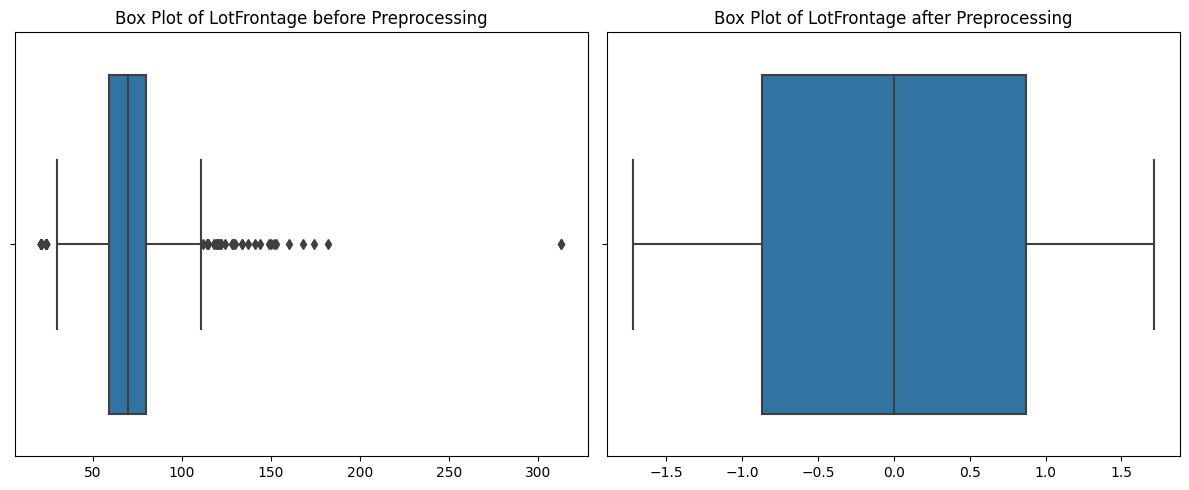

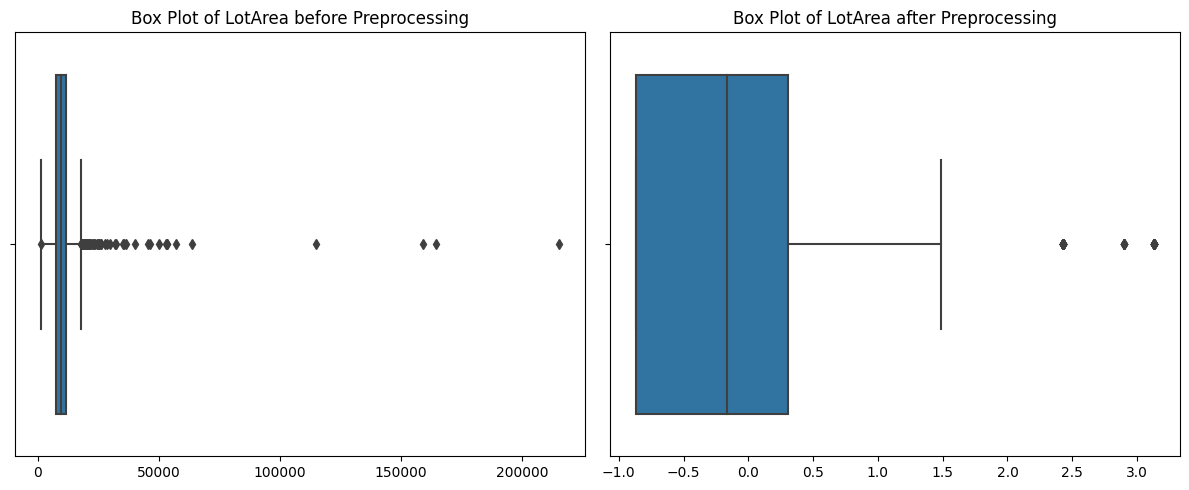

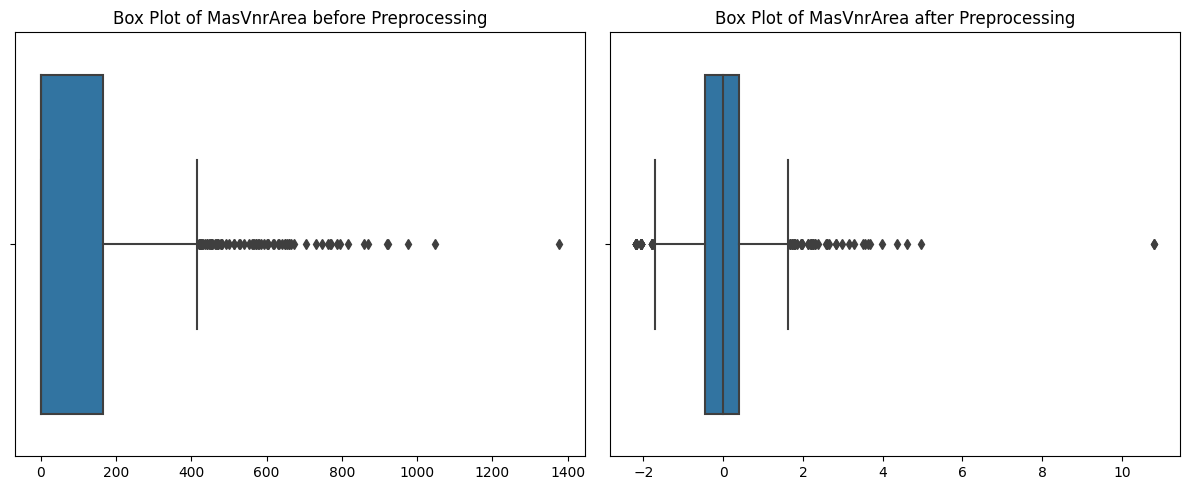

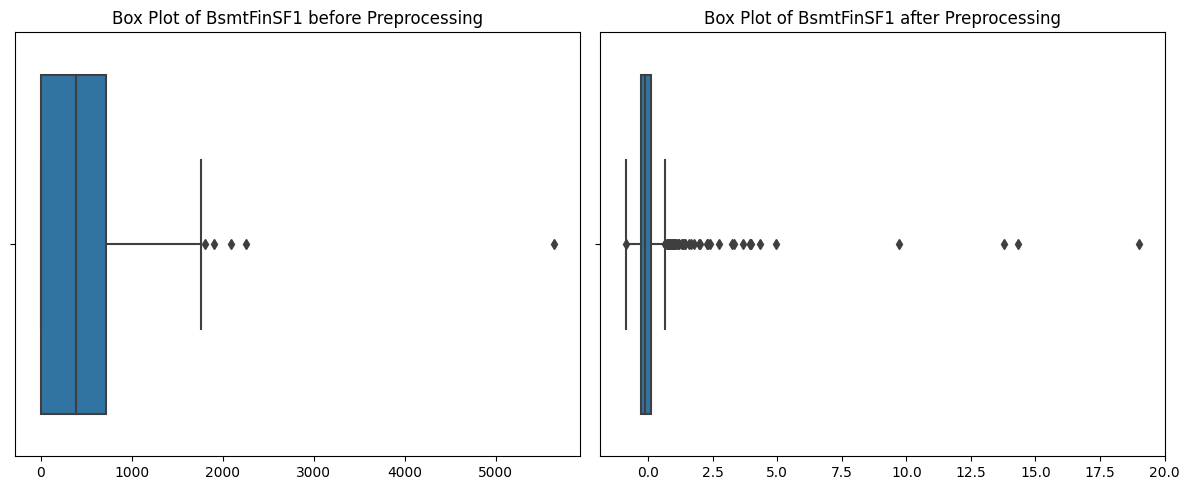

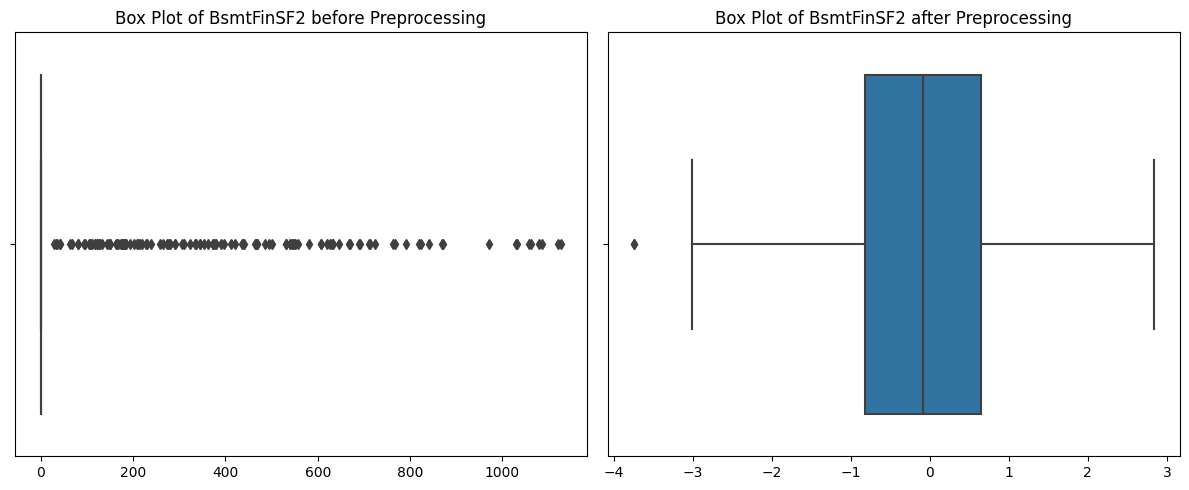

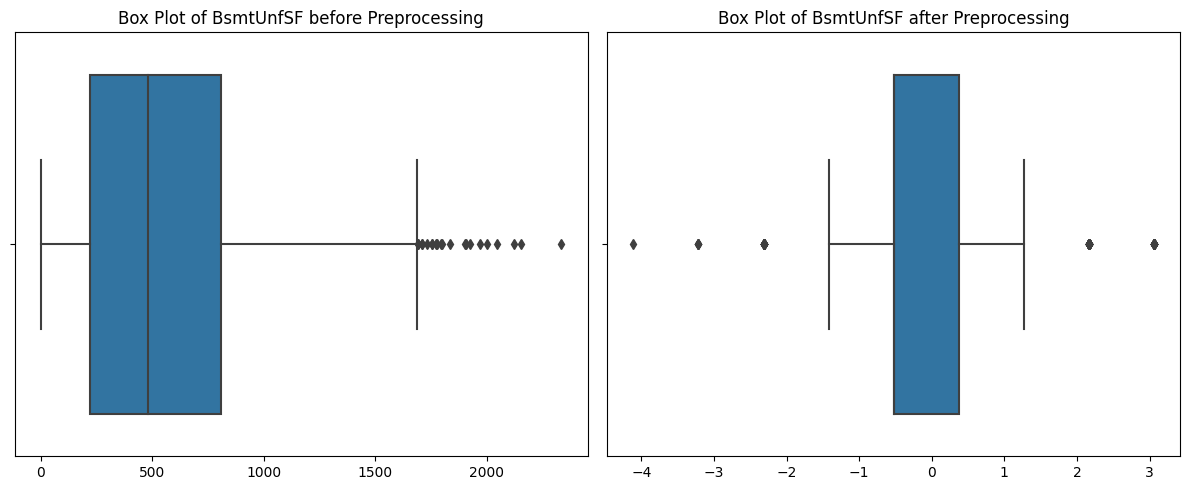

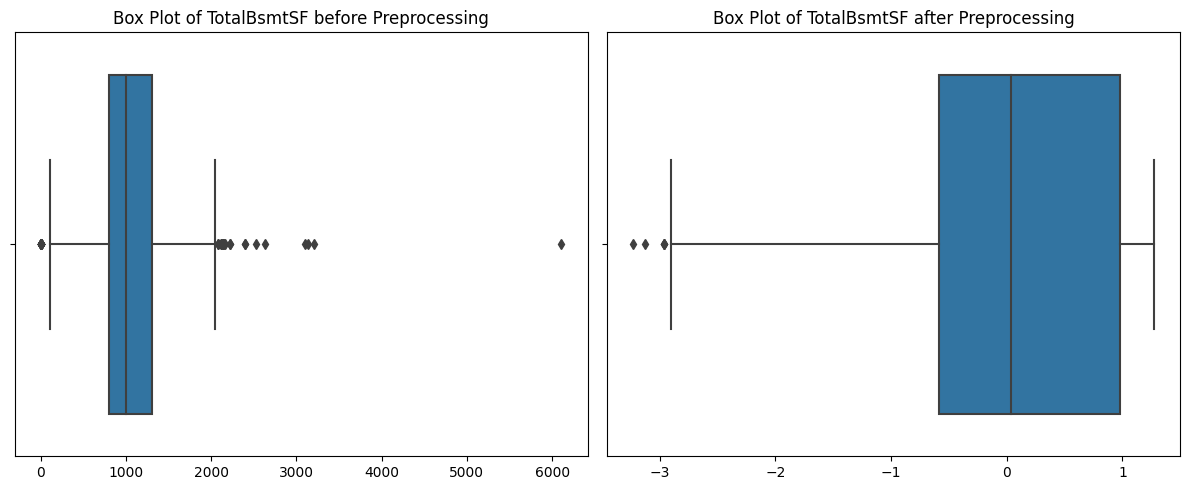

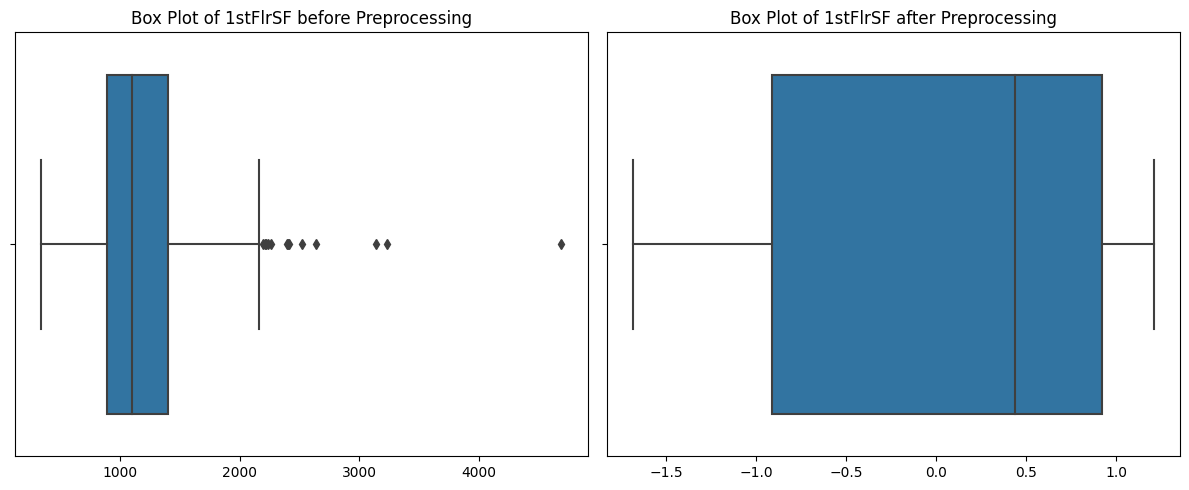

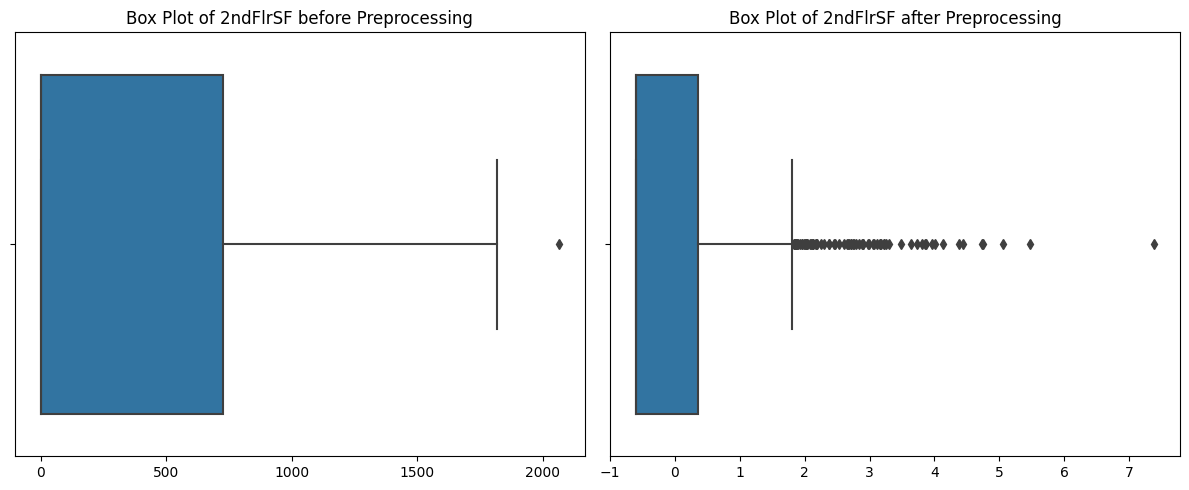

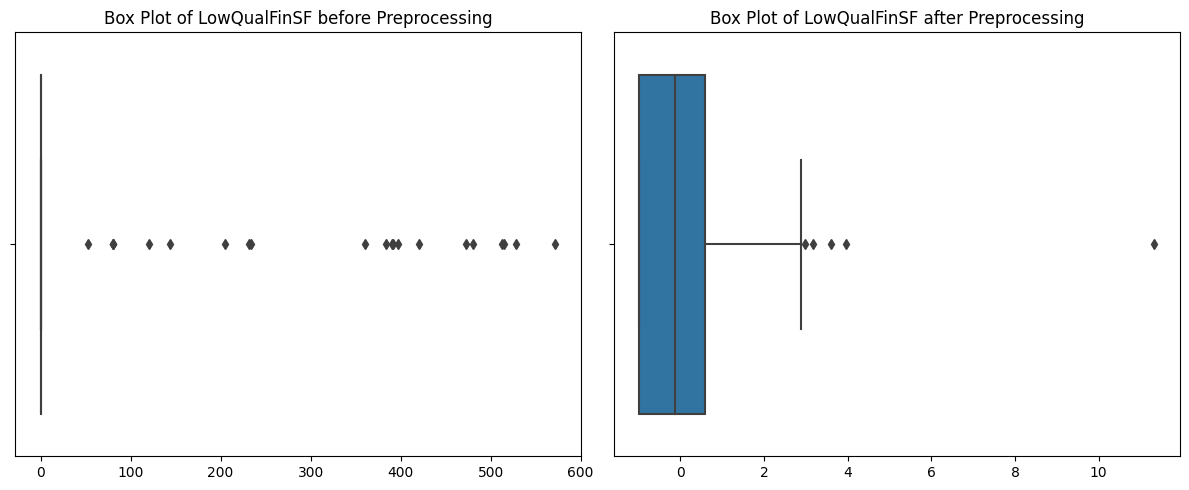

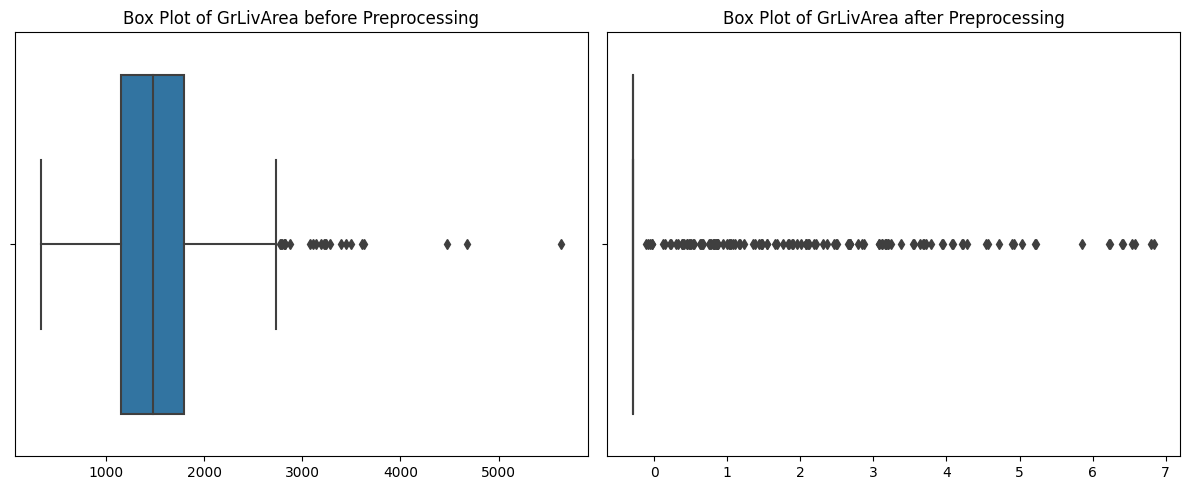

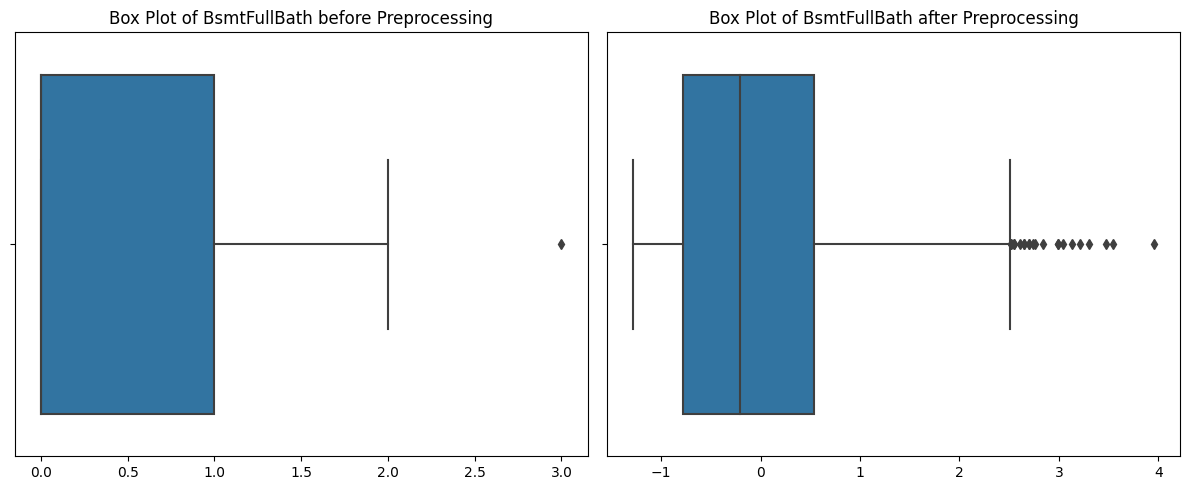

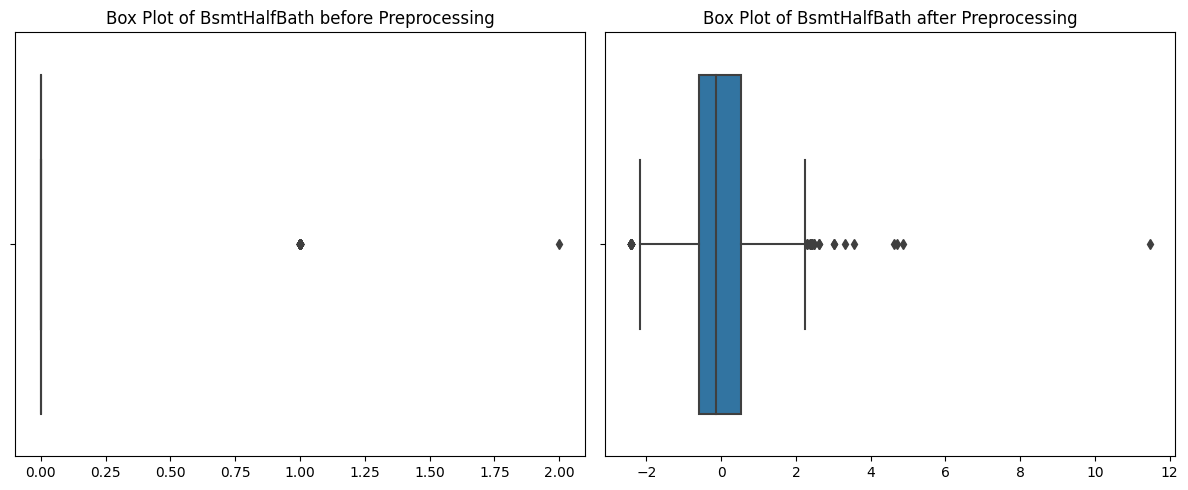

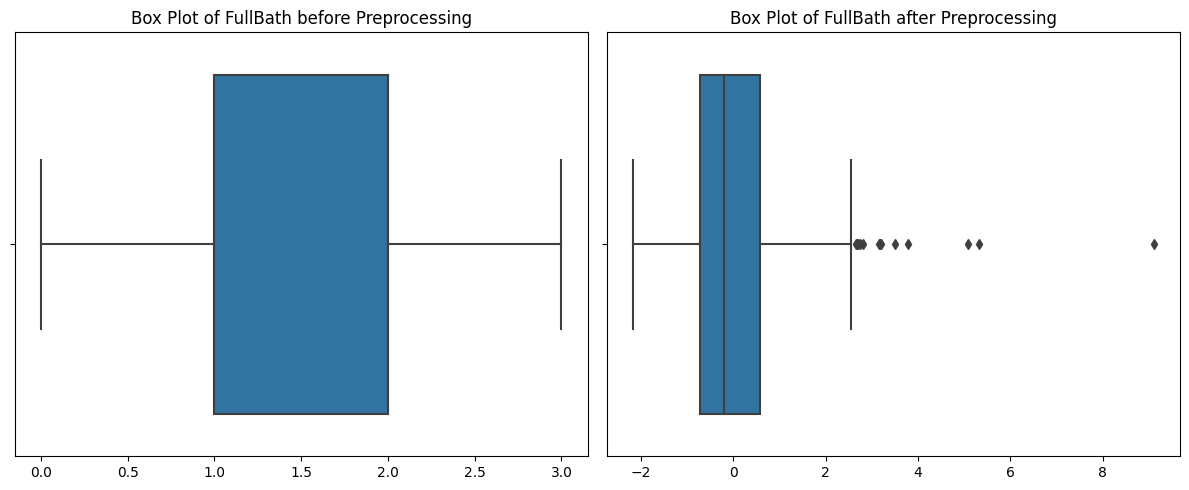

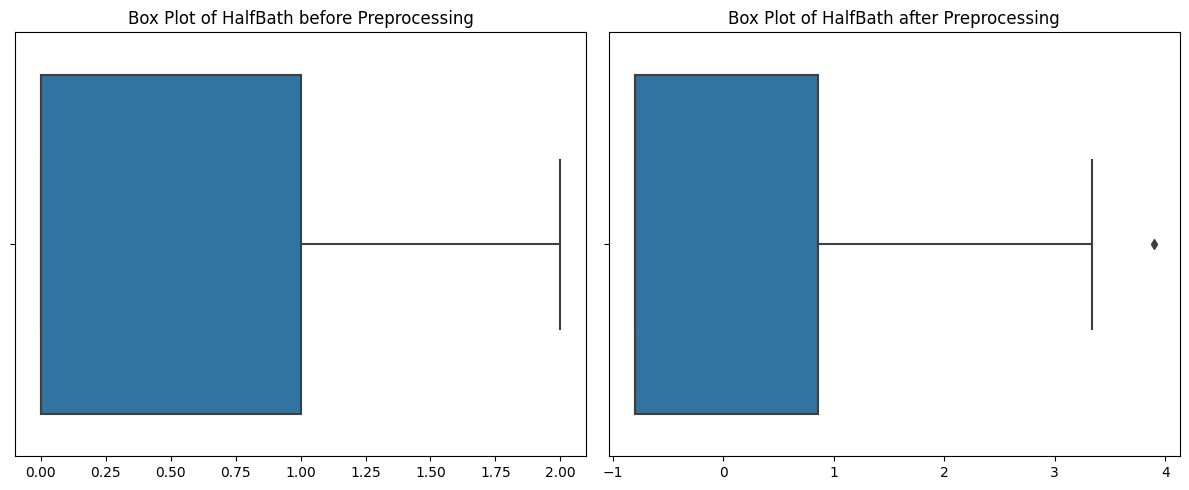

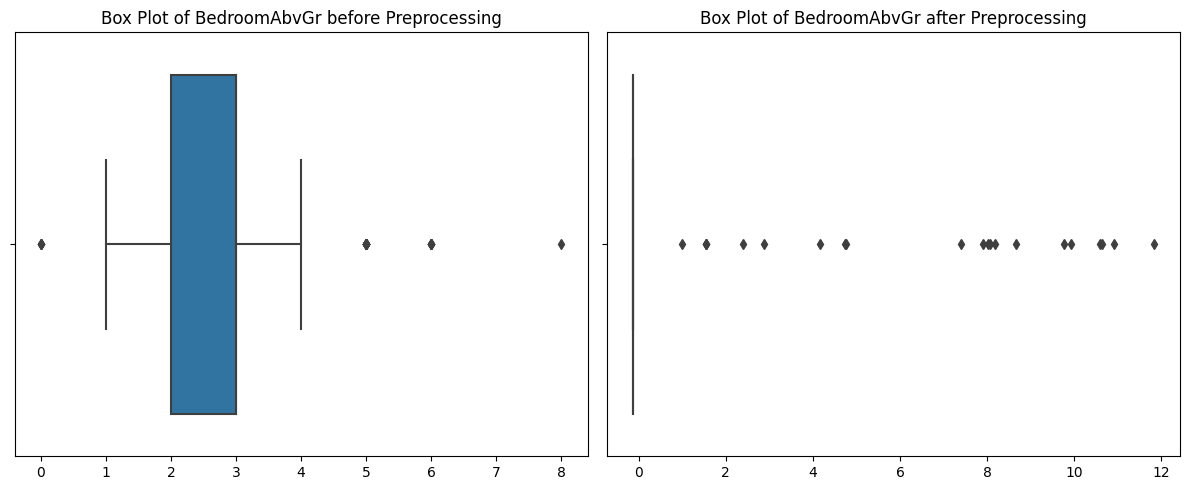

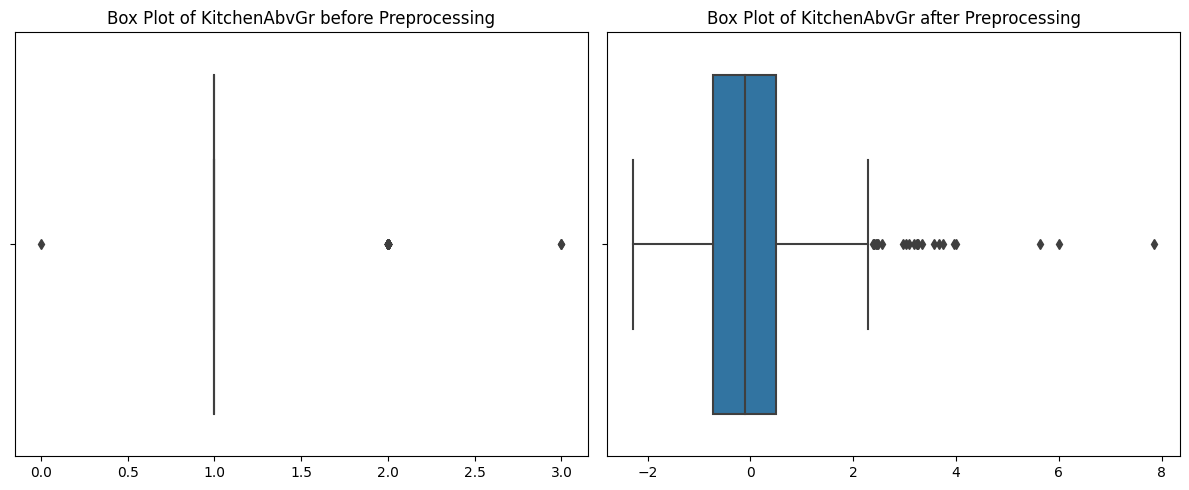

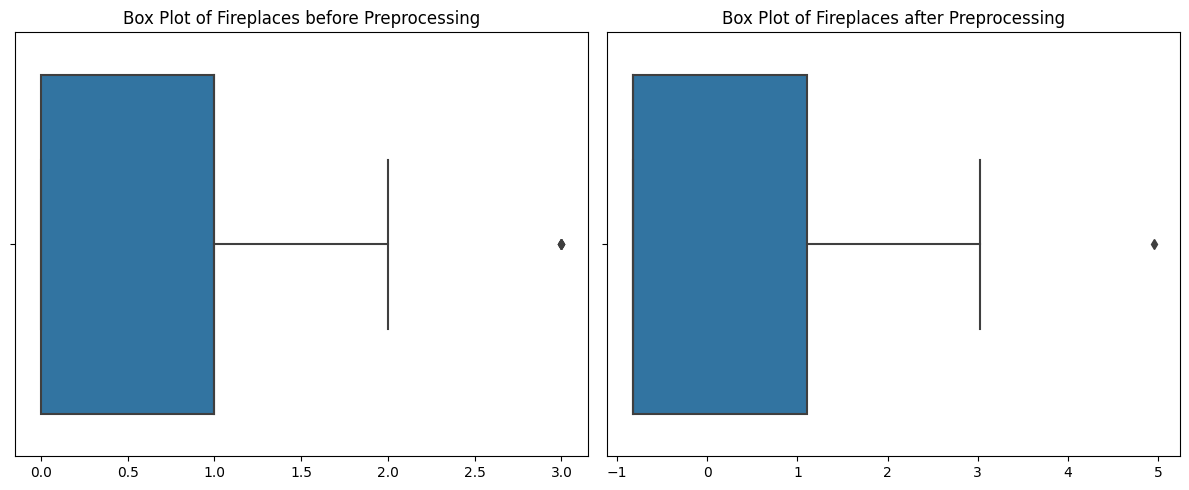

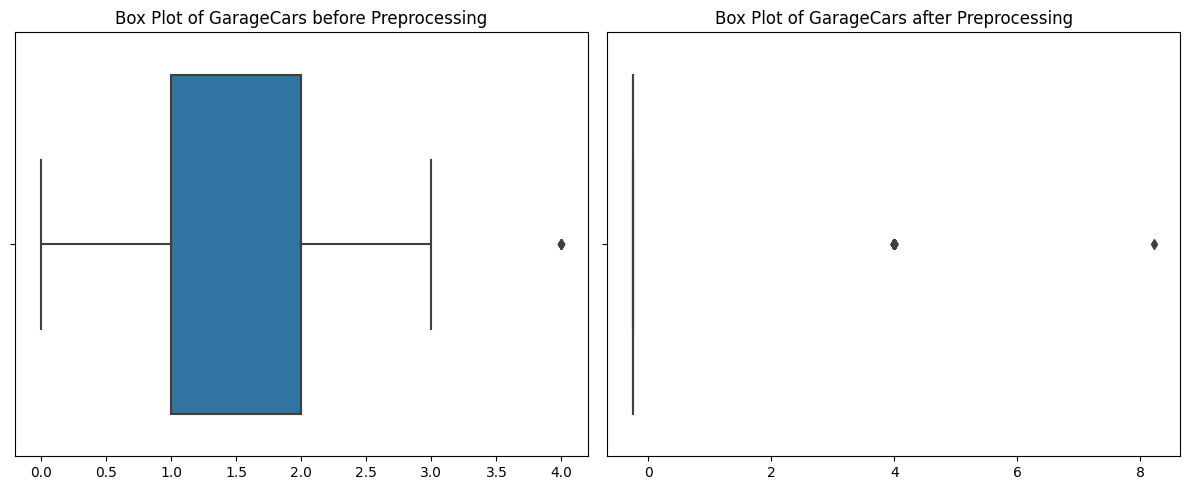

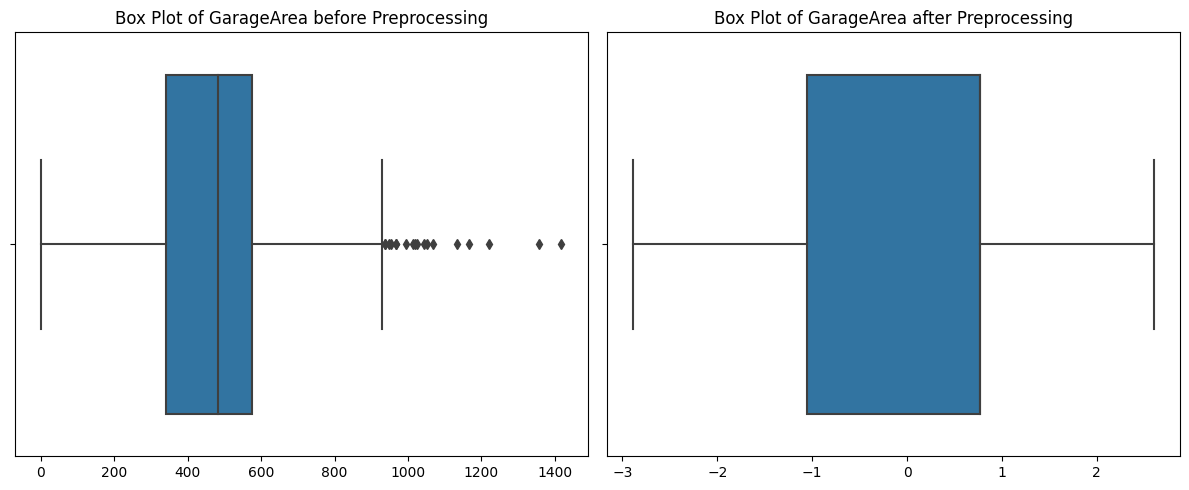

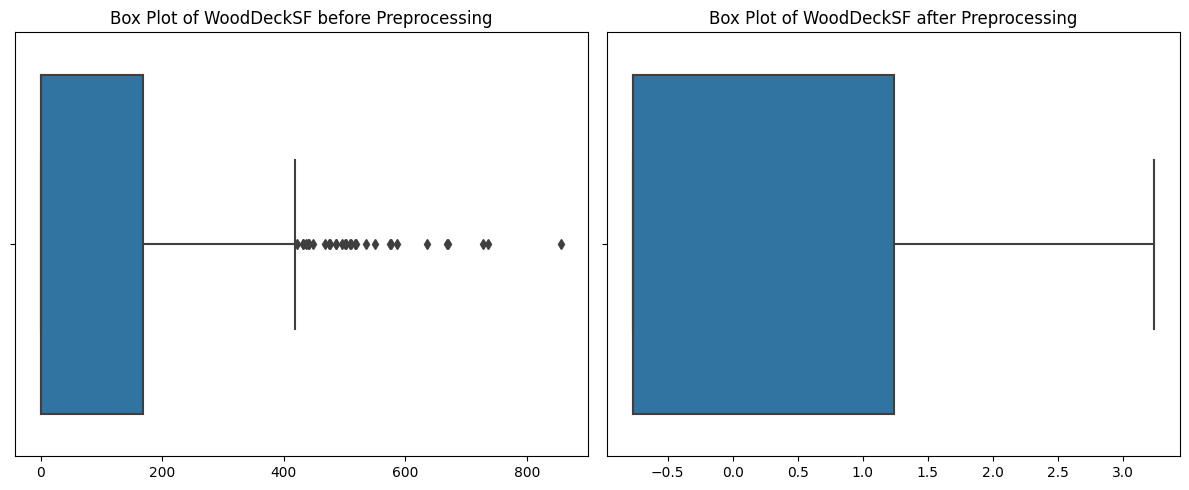

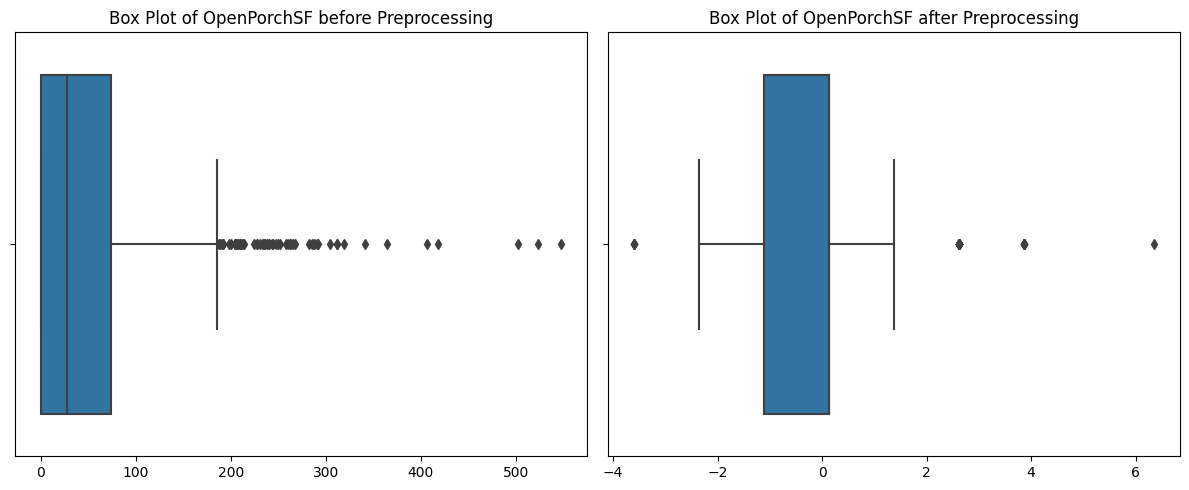

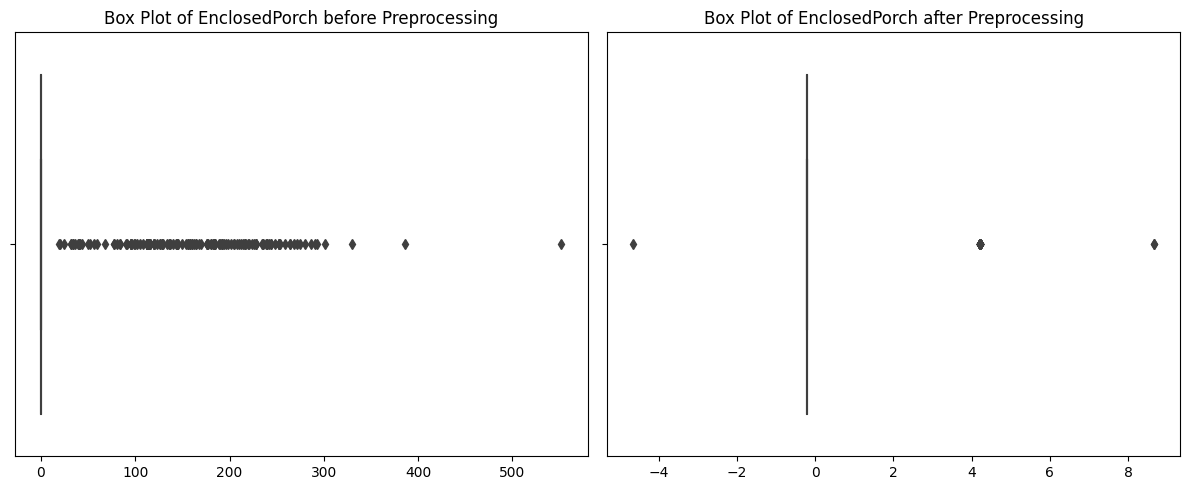

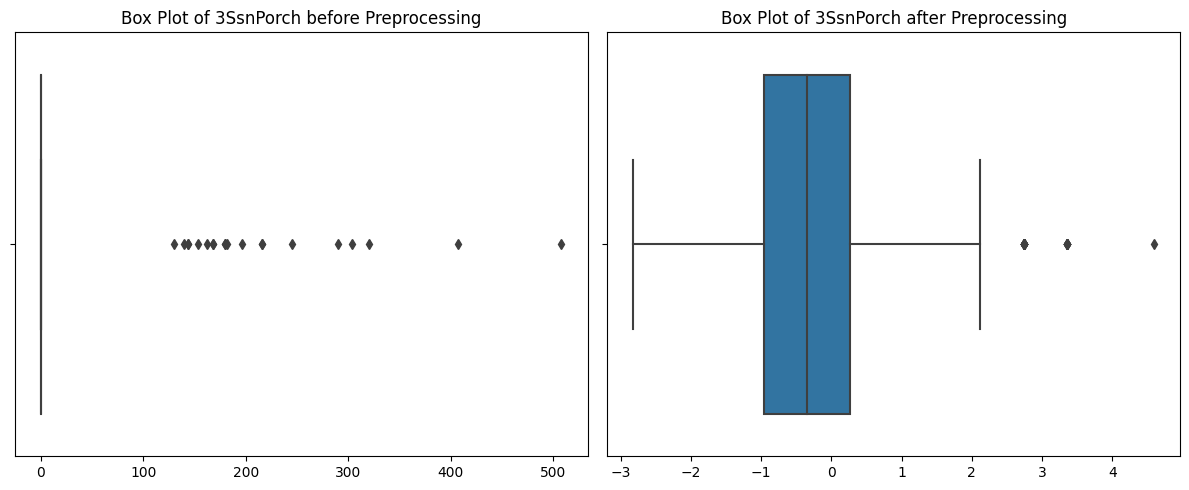

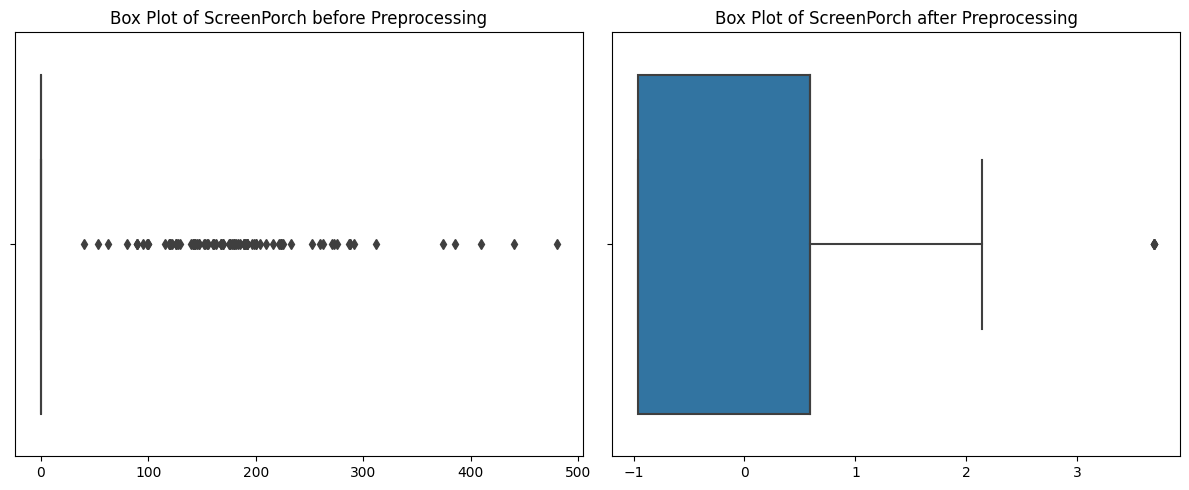

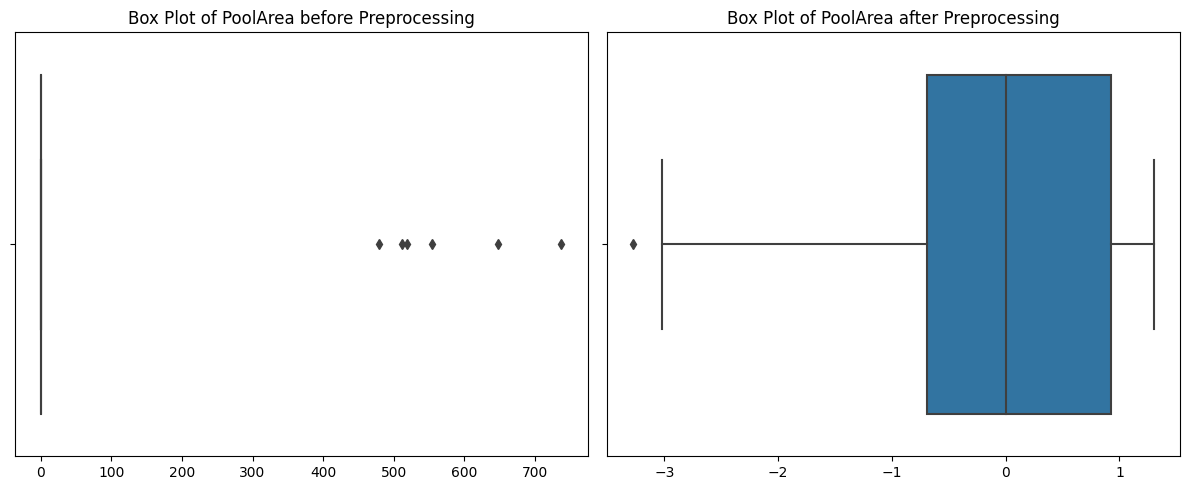

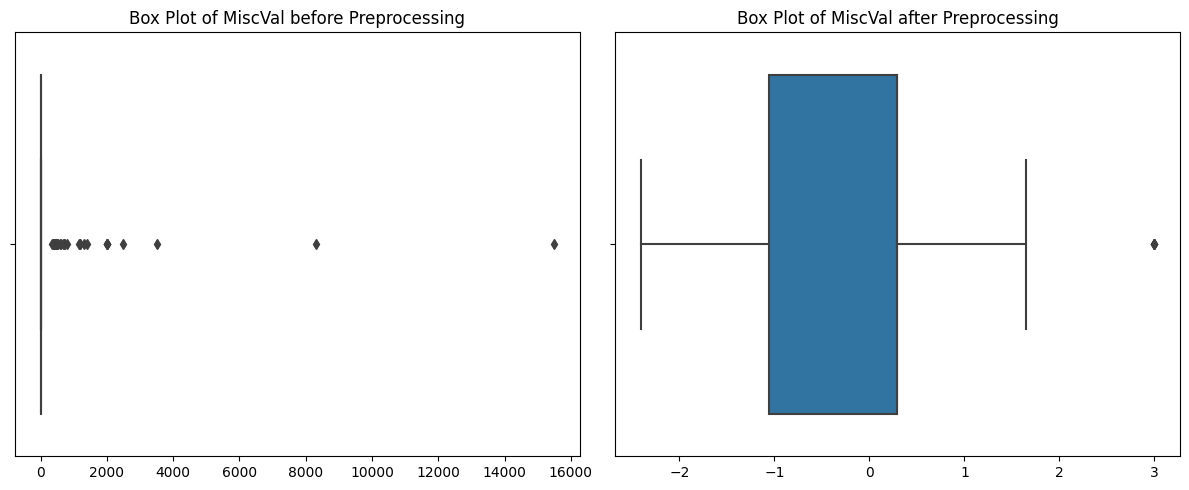

In [26]:
def plot_box_plots(X_train, X_train_preprocessed, numerical_features):
    if isinstance(X_train_preprocessed, csr_matrix):
        X_train_preprocessed_array = X_train_preprocessed.toarray()
    elif isinstance(X_train_preprocessed, np.ndarray):
        X_train_preprocessed_array = X_train_preprocessed
    elif isinstance(X_train_preprocessed, pd.DataFrame):
        X_train_preprocessed_array = X_train_preprocessed[numerical_features].to_numpy()
    else:
        raise TypeError("Unsupported type for X_train_preprocessed. Expected DataFrame, NumPy array, or sparse matrix.")

    if isinstance(X_train, pd.DataFrame):
        missing_features = [feature for feature in numerical_features if feature not in X_train.columns]
        if missing_features:
            raise KeyError(f"Columns not found in X_train: {missing_features}")
        X_train_array = X_train[numerical_features].to_numpy()
    elif isinstance(X_train, np.ndarray):
        feature_indices = [i for i, feature in enumerate(X_train.columns) if feature in numerical_features]
        X_train_array = X_train[:, feature_indices]
    else:
        raise TypeError("Unsupported type for X_train. Expected DataFrame or NumPy array.")
    
    for i, column in enumerate(numerical_features):
        plt.figure(figsize=(12, 5))
        
        # Box plot before preprocessing
        plt.subplot(1, 2, 1)
        sns.boxplot(x=X_train_array[:, i])
        plt.title(f'Box Plot of {column} before Preprocessing')
        
        # Box plot after preprocessing
        plt.subplot(1, 2, 2)
        sns.boxplot(x=X_train_preprocessed_array[:, i])
        plt.title(f'Box Plot of {column} after Preprocessing')
        
        plt.tight_layout()
        plt.show()

# Example usage
plot_box_plots(X_train, X_train_preprocessed, numerical_features)


In [30]:
def print_statistical_summary(X_train, X_train_preprocessed, numerical_features):
    # Convert preprocessed data to a NumPy array if needed
    if isinstance(X_train_preprocessed, csr_matrix):
        X_train_preprocessed_array = X_train_preprocessed.toarray()
    elif isinstance(X_train_preprocessed, np.ndarray):
        X_train_preprocessed_array = X_train_preprocessed
    elif isinstance(X_train_preprocessed, pd.DataFrame):
        X_train_preprocessed_array = X_train_preprocessed.to_numpy()
    else:
        raise TypeError("Unsupported type for X_train_preprocessed. Expected DataFrame, NumPy array, or sparse matrix.")
    
    # Check the type and shape of X_train
    if isinstance(X_train, pd.DataFrame):
        missing_features = [feature for feature in numerical_features if feature not in X_train.columns]
        if missing_features:
            raise KeyError(f"Columns not found in X_train: {missing_features}")
        X_train_array = X_train[numerical_features].to_numpy()
    elif isinstance(X_train, np.ndarray):
        feature_indices = [i for i, feature in enumerate(X_train.columns) if feature in numerical_features]
        X_train_array = X_train[:, feature_indices]
    else:
        raise TypeError("Unsupported type for X_train. Expected DataFrame or NumPy array.")
    
    # Print shape of arrays
    print(f"Shape of X_train_array: {X_train_array.shape}")
    print(f"Shape of X_train_preprocessed_array: {X_train_preprocessed_array.shape}")

    # Print statistical summary before preprocessing
    print("Statistical summary before preprocessing:")
    before_stats = pd.DataFrame(X_train_array, columns=numerical_features).describe()
    print(before_stats)
    
    # Print some column names of the preprocessed data for inspection
    if X_train_preprocessed_array.shape[1] != len(numerical_features):
        print("Columns in preprocessed data:")
        if isinstance(X_train_preprocessed, pd.DataFrame):
            print(X_train_preprocessed.columns.tolist())
        else:
            print("Preprocessed data has no column names available.")

    # Print statistical summary after preprocessing
    print("\nStatistical summary after preprocessing:")
    try:
        after_stats = pd.DataFrame(X_train_preprocessed_array).describe()
        print(after_stats)
    except ValueError as e:
        print(f"Error creating DataFrame for preprocessed data: {e}")

# Example usage
print_statistical_summary(X_train, X_train_preprocessed, numerical_features)


Shape of X_train_array: (1168, 27)
Shape of X_train_preprocessed_array: (1168, 286)
Statistical summary before preprocessing:
       LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count   951.000000    1168.000000  1162.000000  1168.000000  1168.000000   
mean     70.343849   10689.642123   103.771945   446.023973    45.152397   
std      24.897021   10759.366198   173.032238   459.070977   158.217499   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      59.000000    7587.250000     0.000000     0.000000     0.000000   
50%      70.000000    9600.000000     0.000000   384.500000     0.000000   
75%      80.000000   11700.000000   166.000000   721.000000     0.000000   
max     313.000000  215245.000000  1378.000000  5644.000000  1127.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  ...  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000  ...   
mean    570.595034  1061.7714

Shape of X_train_array: (1168, 27)
Shape of X_train_preprocessed_array: (1168, 286)


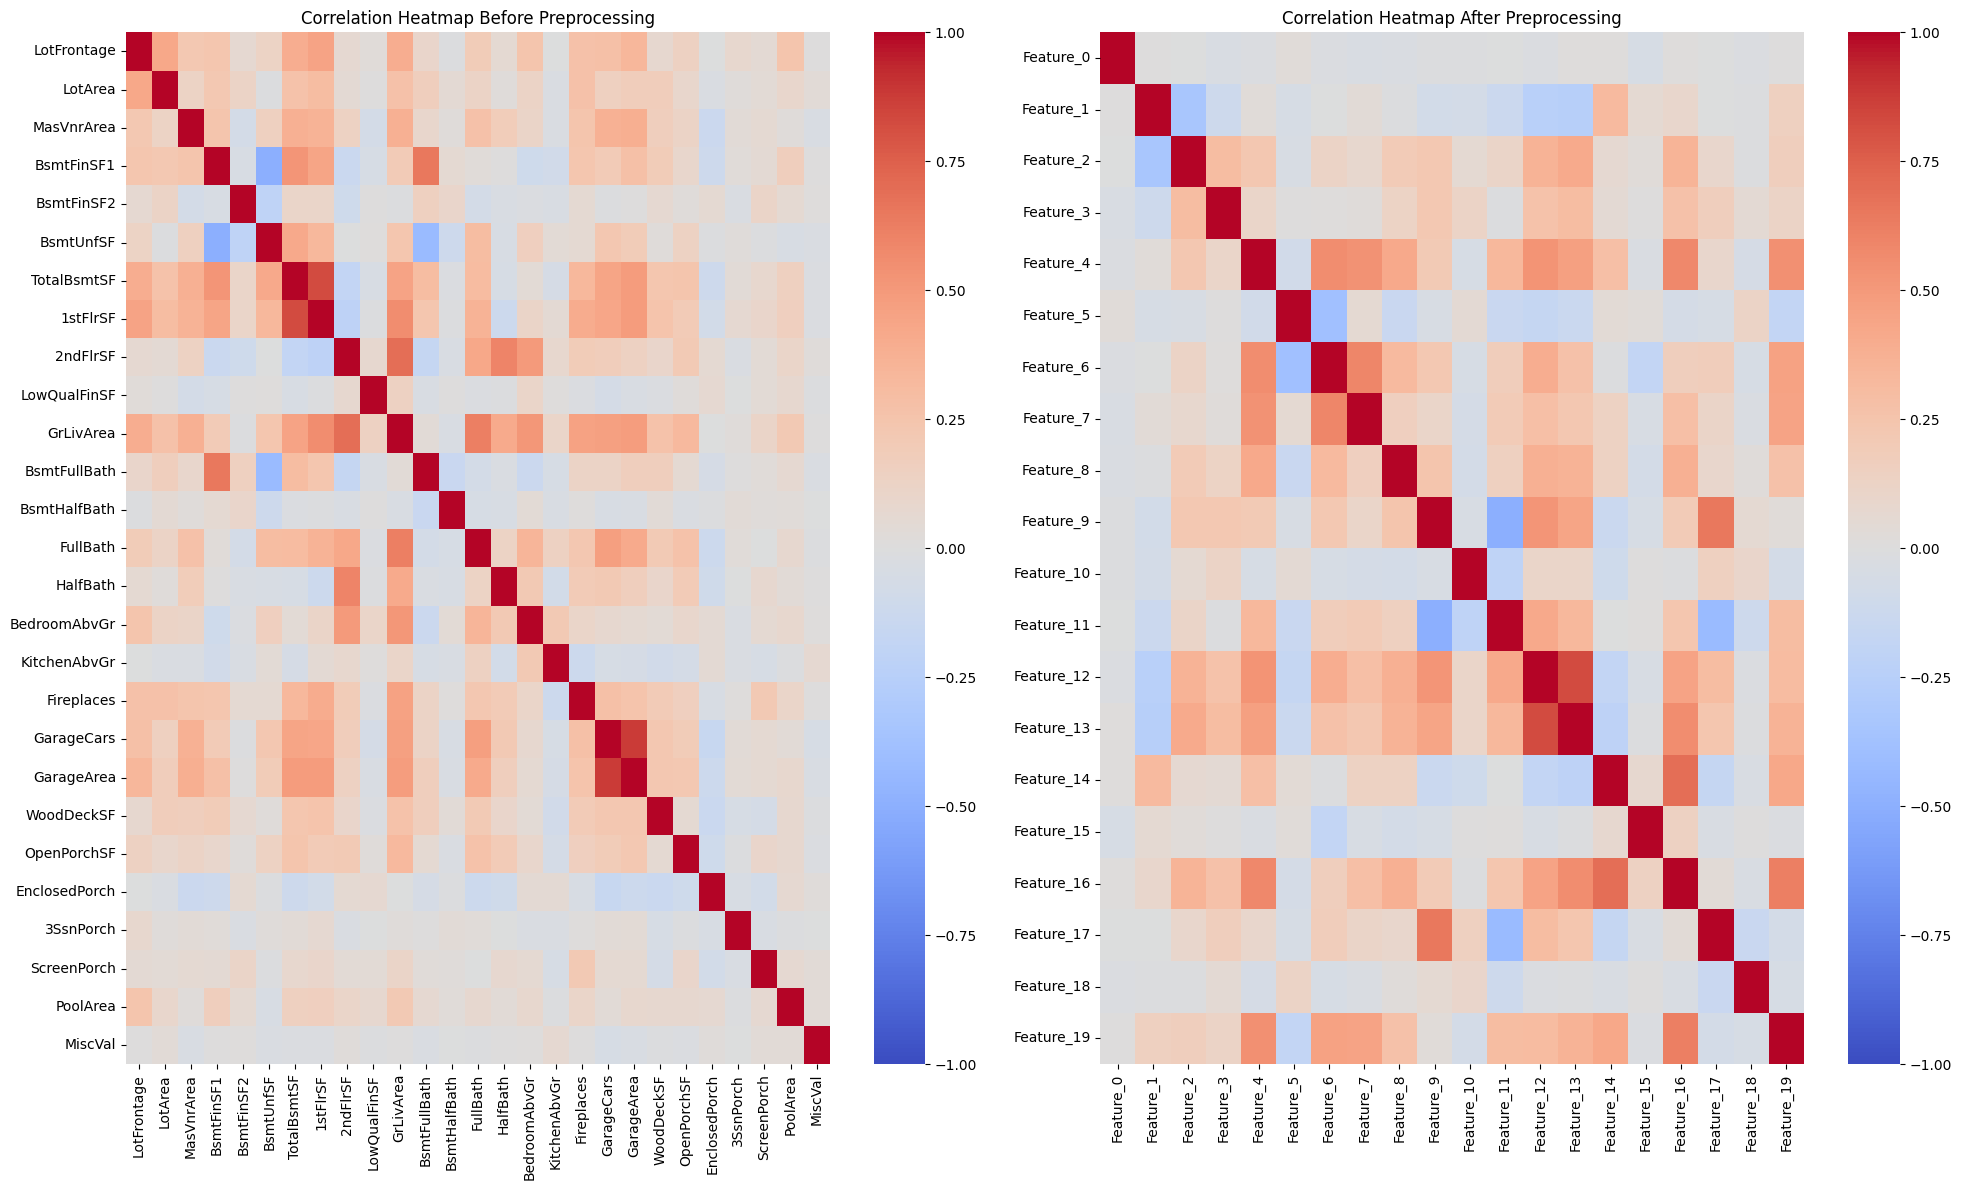

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

def plot_correlation_heatmaps(X_train, X_train_preprocessed, numerical_features, max_features=20):
    # Convert preprocessed data to array if needed
    if isinstance(X_train_preprocessed, csr_matrix):
        X_train_preprocessed_array = X_train_preprocessed.toarray()
    elif isinstance(X_train_preprocessed, np.ndarray):
        X_train_preprocessed_array = X_train_preprocessed
    elif isinstance(X_train_preprocessed, pd.DataFrame):
        X_train_preprocessed_array = X_train_preprocessed.to_numpy()
    else:
        raise TypeError("Unsupported type for X_train_preprocessed. Expected DataFrame, NumPy array, or sparse matrix.")

    # Extract the original data based on type
    if isinstance(X_train, pd.DataFrame):
        missing_features = [feature for feature in numerical_features if feature not in X_train.columns]
        if missing_features:
            raise KeyError(f"Columns not found in X_train: {missing_features}")
        X_train_array = X_train[numerical_features].to_numpy()
    elif isinstance(X_train, np.ndarray):
        feature_indices = [i for i, feature in enumerate(X_train.columns) if feature in numerical_features]
        X_train_array = X_train[:, feature_indices]
    else:
        raise TypeError("Unsupported type for X_train. Expected DataFrame or NumPy array.")
    
    # Print shapes for inspection
    print(f"Shape of X_train_array: {X_train_array.shape}")
    print(f"Shape of X_train_preprocessed_array: {X_train_preprocessed_array.shape}")

    # Handle preprocessed columns
    if isinstance(X_train_preprocessed, pd.DataFrame):
        preprocessed_columns = X_train_preprocessed.columns.tolist()
    else:
        preprocessed_columns = [f'Feature_{i}' for i in range(X_train_preprocessed_array.shape[1])]
    
    # Reduce number of features if too many
    num_features = min(len(preprocessed_columns), max_features)
    preprocessed_columns_subset = preprocessed_columns[:num_features]

    # Plot correlation heatmap before preprocessing
    plt.figure(figsize=(20, 12))
    
    plt.subplot(1, 2, 1)
    sns.heatmap(pd.DataFrame(X_train_array, columns=numerical_features).corr(), annot=False, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap Before Preprocessing')
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)

    # Plot correlation heatmap after preprocessing
    plt.subplot(1, 2, 2)
    if len(preprocessed_columns) >= num_features:
        after_df = pd.DataFrame(X_train_preprocessed_array[:, :num_features], columns=preprocessed_columns_subset)
        sns.heatmap(after_df.corr(), annot=False, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Heatmap After Preprocessing')
        plt.xticks(rotation=90, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    else:
        print("Column mismatch: The number of columns in preprocessed data does not match.")
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_correlation_heatmaps(X_train, X_train_preprocessed, numerical_features)
